In [ ]:
import pandas as pd
import os

# 정확한 절대 경로 지정
filepath = "/home/gyeom/code/Recommend_RL/data/cgmacros-a-scientific-dataset-for-personalized-nutrition-and-diet-monitoring-1.0.0/CGMacros_dateshifted365/CGMacros/CGMacros-001/CGMacros-001.csv"

# 파일 불러오기
if os.path.exists(filepath):
    df = pd.read_csv(filepath)
    print("✅ DataFrame 로딩 성공")
    print(df.head(10))
    print("🔍 기본 정보")
    print(df.info())
    print("\n📌 기술 통계 요약")
    display(df.describe())
    print("\n📉 결측값 비율")
    missing_percent = df.isnull().mean() * 100
    display(missing_percent[missing_percent > 0].sort_values(ascending=False))
else:
    print("❌ 파일이 존재하지 않습니다.")

✅ DataFrame 로딩 성공
   Unnamed: 0            Timestamp   Libre GL  Dexcom GL    HR  \
0           0  2020-05-01 10:30:00  84.000000        NaN  56.0   
1           1  2020-05-01 10:31:00  84.133333        NaN  56.0   
2           2  2020-05-01 10:32:00  84.266667        NaN  57.0   
3           3  2020-05-01 10:33:00  84.400000        NaN  54.0   
4           4  2020-05-01 10:34:00  84.533333        NaN  55.0   
5           5  2020-05-01 10:35:00  84.666667        NaN  57.0   
6           6  2020-05-01 10:36:00  84.800000        NaN  59.0   
7           7  2020-05-01 10:37:00  84.933333        NaN  57.0   
8           8  2020-05-01 10:38:00  85.066667        NaN  57.0   
9           9  2020-05-01 10:39:00  85.200000        NaN  57.0   

   Calories (Activity)  METs Meal Type  Calories  Carbs  Protein  Fat  Fiber  \
0              1.04840  10.0       NaN       NaN    NaN      NaN  NaN    NaN   
1              1.04840  10.0       NaN       NaN    NaN      NaN  NaN    NaN   
2              

Unnamed: 0      Libre GL     Dexcom GL            HR  \
count  14730.000000  14730.000000  14265.000000  14618.000000   
mean    7364.500000     88.517379    106.827129     71.795321   
std     4252.329068      9.086953     13.884858     18.484313   
min        0.000000     54.000000     40.000000     41.000000   
25%     3682.250000     82.600000     98.800000     56.000000   
50%     7364.500000     87.066667    106.200000     71.000000   
75%    11046.750000     93.600000    114.600000     85.000000   
max    14729.000000    127.000000    176.000000    176.000000   

       Calories (Activity)          METs     Calories      Carbs    Protein  \
count         14730.000000  14729.000000    43.000000  43.000000  43.000000   
mean              2.121526     20.235454   386.162791  39.860465  21.944186   
std               1.689705     16.117464   304.896933  28.430015  25.296982   
min               1.048400     10.000000    38.000000   0.000000   0.000000   
25%               1.048400     10.000000   120.000000  22.000000   1.950000   
50%               1.258080     12.000000   268.000000  28.000000  17.000000   
75%               3.145200     30.000000   596.500000  66.000000  22.000000   
max              13.524360    129.000000  1170.000000  94.000000  88.000000   

             Fat      Fiber  Amount Consumed   
count  43.000000  42.000000              43.0  
mean   14.609302   2.095238             100.0  
std    15.255425   3.727351               0.0  
min     0.000000   0.000000             100.0  
25%     2.000000   0.000000             100.0  
50%    10.500000   0.000000             100.0  
75%    20.500000   3.000000             100.0  
max    54.200000  12.000000             100.0


📉 결측값 비율


Fiber               99.714868
Meal Type           99.708079
Carbs               99.708079
Protein             99.708079
Fat                 99.708079
Amount Consumed     99.708079
Calories            99.708079
Image path          99.450102
Dexcom GL            3.156823
HR                   0.760353
METs                 0.006789
dtype: float64

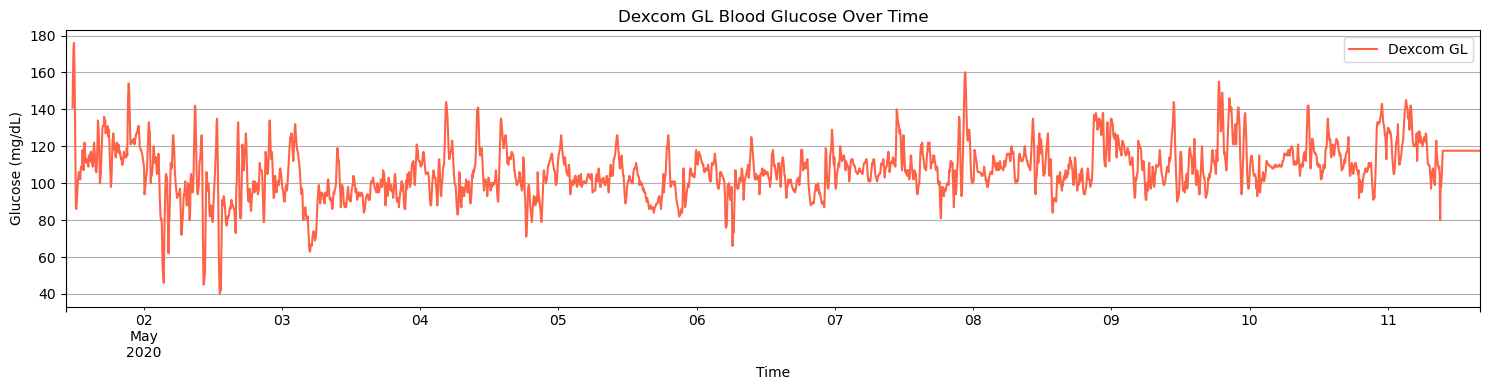

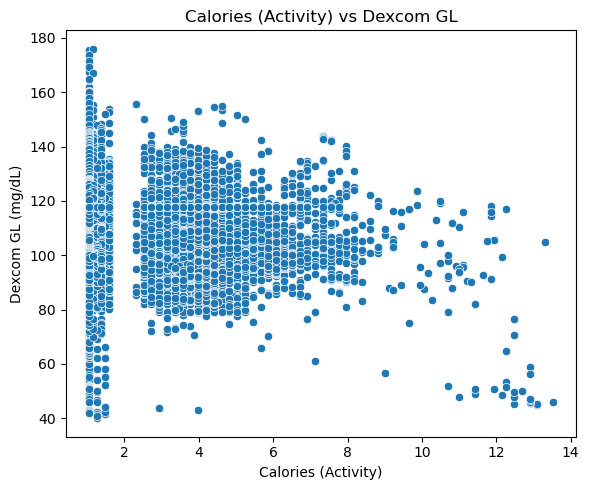

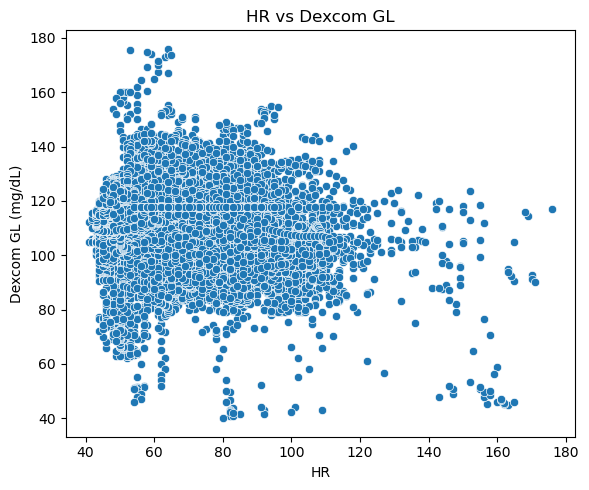

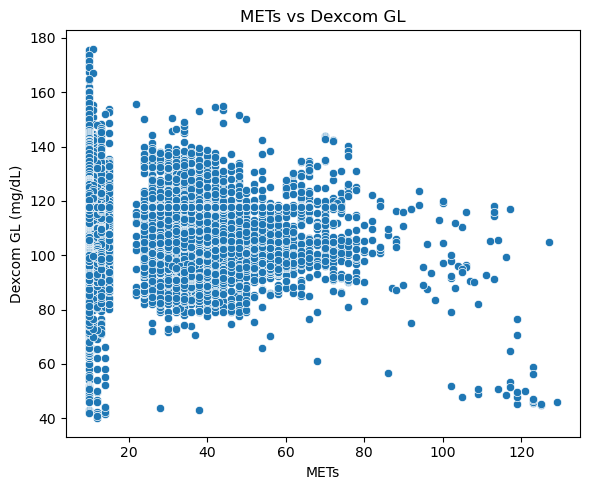

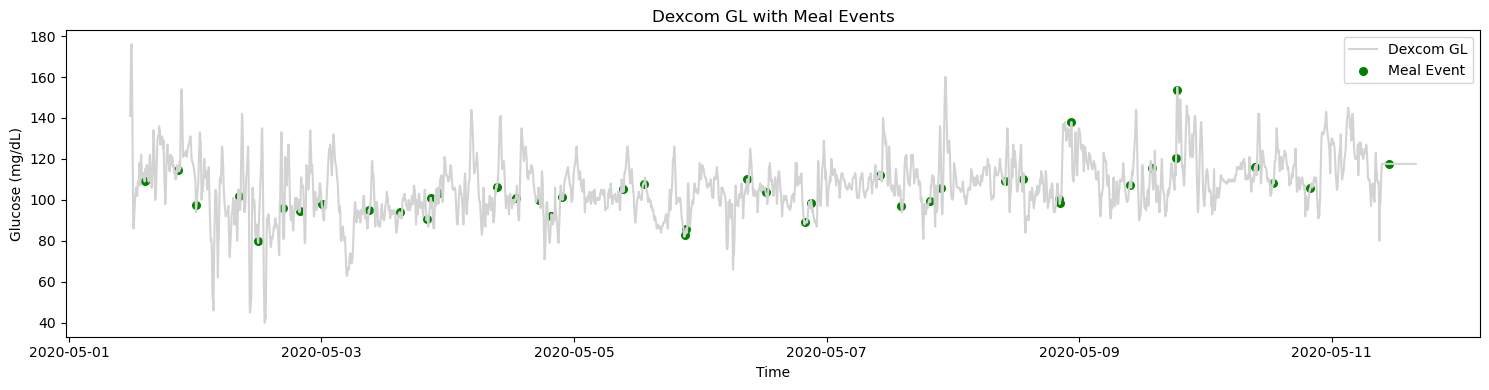

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dexcom GL Time Series
plt.figure(figsize=(15, 4))
df["Dexcom GL"].plot(label="Dexcom GL", color="tomato")
plt.title("Dexcom GL Blood Glucose Over Time")
plt.xlabel("Time")
plt.ylabel("Glucose (mg/dL)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# 2. Scatter Plots: Activity vs Glucose
features = ["Calories (Activity)", "HR", "METs"]
for feat in features:
    if feat in df.columns:
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=df[feat], y=df["Dexcom GL"])
        plt.title(f"{feat} vs Dexcom GL")
        plt.xlabel(feat)
        plt.ylabel("Dexcom GL (mg/dL)")
        plt.tight_layout()
        plt.show()

# 3. Meal Event Overlay
if "Meal Type" in df.columns:
    df_meal = df[~df["Meal Type"].isna()]
    plt.figure(figsize=(15, 4))
    plt.plot(df["Dexcom GL"], label="Dexcom GL", color="lightgray")
    plt.scatter(df_meal.index, df_meal["Dexcom GL"], color="green", label="Meal Event", s=30)
    plt.title("Dexcom GL with Meal Events")
    plt.xlabel("Time")
    plt.ylabel("Glucose (mg/dL)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [17]:
import pandas as pd
import numpy as np

# 예시용: 식사 데이터가 포함된 하나의 환자 데이터프레임 (df_patient)
# 필수 칼럼: ['timestamp', 'Dexcom GL', 'Carbs'] - timestamp는 datetime형

import pandas as pd
import numpy as np

def calculate_meal_response_metrics(df):
    df = df.copy()
    
    # timestamp 정렬
    df['timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values("timestamp").reset_index(drop=True)
    
    meal_rows = df[df['Carbs'].notna() & (df['Carbs'] > 0)].copy()
    meal_metrics = []

    for _, meal in meal_rows.iterrows():
        t0 = meal['timestamp']

        # 식사 직전 혈당 찾기 (1시간 전 이내 중 가장 가까운)
        pre_df = df[(df['timestamp'] < t0) & 
                    (df['timestamp'] >= t0 - pd.Timedelta(hours=1)) & 
                    (df['Dexcom GL'].notna())]
        pre_glucose_row = pre_df.sort_values("timestamp", ascending=False).head(1)

        if pre_glucose_row.empty:
            g0 = np.nan
        else:
            g0 = pre_glucose_row['Dexcom GL'].values[0]

        # 식후 2시간 동안 혈당 데이터 추출
        post_glucose_df = df[(df['timestamp'] > t0) & 
                             (df['timestamp'] <= t0 + pd.Timedelta(hours=2))].copy()

        if post_glucose_df.empty or post_glucose_df['Dexcom GL'].dropna().empty or np.isnan(g0):
            g_max = np.nan
            t_max = np.nan
            delta_g = np.nan
            glucose_gradient = np.nan
        else:
            g_max = post_glucose_df['Dexcom GL'].max()
            t_max = post_glucose_df.loc[post_glucose_df['Dexcom GL'].idxmax(), 'timestamp']
            delta_g = g_max - g0
            glucose_gradient = delta_g / ((t_max - t0).total_seconds() / 3600) if (t_max - t0).total_seconds() > 0 else np.nan

        # AUCG (Area Under Curve for Glucose)
        aucg = np.trapz(post_glucose_df['Dexcom GL'].fillna(method='ffill'), 
                        x=(post_glucose_df['timestamp'] - t0).dt.total_seconds()/60)

        # 식사 관련 정보 포함하여 저장
        meal_metrics.append({
            "meal_time": t0,
            "meal_type": meal.get("Meal Type", np.nan),
            "carbs": meal.get("Carbs", np.nan),
            "calories": meal.get("Calories", np.nan),
            "protein": meal.get("Protein", np.nan),
            "fat": meal.get("Fat", np.nan),
            "fiber": meal.get("Fiber", np.nan),
            "amount": meal.get("Amount Consumed", np.nan),
            "g0": g0,
            "g_max": g_max,
            "delta_g": delta_g,
            "glucose_gradient": glucose_gradient,
            "aucg": aucg
        })

    return pd.DataFrame(meal_metrics)

df_patient = pd.read_csv(filepath)
result_df = calculate_meal_response_metrics(df_patient)
result_df

/tmp/ipykernel_8641/3273952655.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aucg = np.trapz(post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/3273952655.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aucg = np.trapz(post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/3273952655.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aucg = np.trapz(post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/3273952655.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aucg = np.trapz(post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/3273952655.p

meal_time  meal_type  carbs  calories  protein   fat  fiber  \
0  2020-05-01 14:23:00      Lunch   85.0    1170.0     88.0  54.2   12.0   
1  2020-05-01 20:48:00     Dinner   18.0      80.0      0.0   0.0    0.0   
2  2020-05-02 00:15:00     Snacks   24.0     110.0      0.0   2.0    0.0   
3  2020-05-02 08:18:00  Breakfast   66.0     448.0     22.0  10.5    0.0   
4  2020-05-02 12:00:00      Lunch   89.0     840.0     17.0  42.0    3.0   
5  2020-05-02 16:37:00     Snacks    9.0      38.0      0.0   0.0    0.0   
6  2020-05-02 19:52:00     Dinner   32.0     330.0      4.0  22.0    4.0   
7  2020-05-03 00:03:00     Snacks   29.0     160.0      2.0   4.0    0.0   
8  2020-05-03 09:07:00  Breakfast   66.0     608.0     66.0  10.5    0.0   
9  2020-05-03 14:51:00      Lunch   26.0     615.0     67.0  30.0    3.0   
10 2020-05-03 20:02:00     Dinner   28.0     240.0      9.0  10.0    3.0   
11 2020-05-03 20:48:00     Snacks   22.0      90.0      1.0   0.0    0.0   
12 2020-05-03 22:26:00     Snacks   11.0     107.0      7.0   3.0    0.0   
13 2020-05-04 09:17:00  Breakfast   66.0     712.0     22.0  42.0    0.0   
14 2020-05-04 12:59:00      Lunch   94.0     555.0     12.0  13.0    3.0   
15 2020-05-04 17:26:00     Snacks   27.0     100.0      0.0   0.0    0.0   
16 2020-05-04 19:42:00     Dinner    1.0     210.0     13.0  17.0    0.0   
17 2020-05-04 21:47:00     Snacks   22.0     100.0      0.0   2.0    0.0   
18 2020-05-05 09:22:00  Breakfast   73.0     902.0     66.0  42.0    7.0   
19 2020-05-05 13:16:00      Lunch   28.0     425.0     27.0  23.0    3.0   
20 2020-05-05 21:05:00     Dinner    1.0     133.0     27.0   2.0    0.0   
21 2020-05-05 21:18:00     Dinner   14.0      60.0      0.0   0.0    1.0   
22 2020-05-06 08:54:00  Breakfast   24.0     268.0     22.0  10.5    0.0   
23 2020-05-06 12:25:00      Lunch   93.0    1110.0     84.0  44.0    3.0   
24 2020-05-06 19:56:00     Dinner   42.0     242.0      7.0   5.0    0.0   
25 2020-05-06 20:58:00     Dinner   32.0     193.0      5.0   4.0    3.0   
26 2020-05-07 10:07:00  Breakfast   66.0     448.0     22.0  10.5    0.0   
27 2020-05-07 14:12:00      Lunch   76.0     575.0     22.0  19.0   12.0   
28 2020-05-07 21:50:00     Snacks   18.0      98.0      1.9   2.0    0.0   
29 2020-05-08 09:58:00  Breakfast   66.0     608.0     66.0  10.5    0.0   
30 2020-05-08 13:26:00      Lunch   40.0     585.0     76.0  17.0   12.0   
31 2020-05-08 20:16:00     Dinner   32.0     370.0     16.0  21.0    0.0   
32 2020-05-08 20:22:00     Dinner   12.0     133.0      2.7   8.0    0.0   
33 2020-05-08 22:29:00     Snacks   28.0     120.0      1.0   0.0    0.0   
34 2020-05-09 09:35:00  Breakfast   66.0     712.0     22.0  42.0    0.0   
35 2020-05-09 13:46:00      Lunch   43.0     445.0     20.0  20.0   12.0   
36 2020-05-09 18:26:00     Dinner   28.0     120.0      1.0   0.0    0.0   
37 2020-05-10 09:27:00  Breakfast   24.0     268.0     22.0  10.5    0.0   
38 2020-05-10 12:47:00      Lunch   94.0     735.0     44.0  20.0    NaN   
39 2020-05-10 19:59:00     Dinner   26.0     100.0      0.0   0.0    0.0   
40 2020-05-11 10:58:00  Breakfast   73.0     902.0     22.0  42.0    7.0   

    amount     g0  g_max  delta_g  glucose_gradient     aucg  
0      NaN  109.8  134.0     24.2         14.376238  13756.0  
1      NaN  114.6  154.0     39.4         65.666667  15078.0  
2      NaN   97.0  133.0     36.0         55.384615  13452.0  
3      NaN  102.6  142.0     39.4         65.666667  13078.1  
4      NaN   79.0  135.0     56.0         76.363636  10469.2  
5      NaN  100.0  127.0     27.0         24.179104  12177.1  
6      NaN   94.4  133.6     39.2         19.600000  12459.8  
7      NaN   98.6  127.0     28.4         17.750000  12750.1  
8      NaN   94.8  119.0     24.2         45.375000  11843.5  
9      NaN   94.0  103.0      9.0          9.310345  11545.9  
10     NaN   90.4  105.0     14.6          8.186916  11308.8  
11     NaN  101.0  111.8     10.8          5.400000  11830.6  
1

In [20]:
import pandas as pd
import numpy as np
import os

# 함수: 식사 반응 지표 계산
def calculate_meal_response_metrics(df, patient_id):
    df = df.copy()
    df['timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    df = df.sort_values("timestamp").reset_index(drop=True)
    meal_rows = df[df['Carbs'].notna() & (df['Carbs'] > 0)].copy()
    meal_metrics = []

    for _, meal in meal_rows.iterrows():
        t0 = meal['timestamp']
        pre_df = df[(df['timestamp'] < t0) & 
                    (df['timestamp'] >= t0 - pd.Timedelta(hours=1)) & 
                    (df['Dexcom GL'].notna())]
        pre_glucose_row = pre_df.sort_values("timestamp", ascending=False).head(1)
        g0 = pre_glucose_row['Dexcom GL'].values[0] if not pre_glucose_row.empty else np.nan
        post_glucose_df = df[(df['timestamp'] > t0) & 
                             (df['timestamp'] <= t0 + pd.Timedelta(hours=2))].copy()

        if post_glucose_df.empty or post_glucose_df['Dexcom GL'].dropna().empty or np.isnan(g0):
            g_max = np.nan
            t_max = np.nan
            delta_g = np.nan
            glucose_gradient = np.nan
        else:
            g_max = post_glucose_df['Dexcom GL'].max()
            t_max = post_glucose_df.loc[post_glucose_df['Dexcom GL'].idxmax(), 'timestamp']
            delta_g = g_max - g0
            glucose_gradient = delta_g / ((t_max - t0).total_seconds() / 3600) if (t_max - t0).total_seconds() > 0 else np.nan

        aucg = np.trapz(
            post_glucose_df['Dexcom GL'].fillna(method='ffill'), 
            x=(post_glucose_df['timestamp'] - t0).dt.total_seconds() / 60
        )

        meal_metrics.append({
            "patient_id": patient_id,
            "meal_time": t0,
            "meal_type": meal.get("Meal Type", np.nan),
            "carbs": meal.get("Carbs", np.nan),
            "calories": meal.get("Calories", np.nan),
            "protein": meal.get("Protein", np.nan),
            "fat": meal.get("Fat", np.nan),
            "fiber": meal.get("Fiber", np.nan),
            "amount": meal.get("Amount Consumed", np.nan),
            "g0": g0,
            "g_max": g_max,
            "delta_g": delta_g,
            "glucose_gradient": glucose_gradient,
            "aucg": aucg
        })
    
    return pd.DataFrame(meal_metrics)

# 전체 환자 파일 반복 처리
base_path = "/home/gyeom/code/Recommend_RL/data/cgmacros-a-scientific-dataset-for-personalized-nutrition-and-diet-monitoring-1.0.0/CGMacros_dateshifted365/CGMacros"
all_results = []

for pid in range(1, 50):  # 001 ~ 049
    patient_id = f"{pid:03d}"
    filepath = os.path.join(base_path, f"CGMacros-{patient_id}", f"CGMacros-{patient_id}.csv")
    if os.path.exists(filepath):
        try:
            df_patient = pd.read_csv(filepath)
            result_df = calculate_meal_response_metrics(df_patient, patient_id)
            all_results.append(result_df)
        except Exception as e:
            print(f"❌ Failed to process patient {patient_id}: {e}")
    else:
        print(f"⚠️ File not found for patient {patient_id}")

import os

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
output_path = os.path.join(current_dir, "meal_response_metrics.csv")

# 하나로 통합
final_df = pd.concat(all_results, ignore_index=True)
final_df.to_csv(output_path, index=False)
print(f"✅ 저장 완료: {output_path}")

/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated a

⚠️ File not found for patient 024
⚠️ File not found for patient 025


/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated a

⚠️ File not found for patient 037
⚠️ File not found for patient 040


/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated a

✅ 저장 완료: /home/gyeom/code/Recommend_RL/data/meal_response_metrics.csv


/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  post_glucose_df['Dexcom GL'].fillna(method='ffill'),
/tmp/ipykernel_8641/1153246045.py:35: FutureWarning: Series.fillna with 'method' is deprecated a

In [33]:
import os
from glob import glob

import pandas as pd


# 환자별 파일 경로 리스트
base_path = "/home/gyeom/code/Recommend_RL/data/cgmacros-a-scientific-dataset-for-personalized-nutrition-and-diet-monitoring-1.0.0/CGMacros_dateshifted365/CGMacros"

# 환자별 메타데이터 로드
bio_df = pd.read_csv(f"{base_path}/bio.csv")
gut_df = pd.read_csv(f"{base_path}/gut_health_test.csv")
microbe_df = pd.read_csv(f"{base_path}/microbes.csv")

# 주요 정보 확인
bio_columns = bio_df.columns.tolist()
gut_columns = gut_df.columns.tolist()
microbe_columns = microbe_df.columns.tolist()

bio_df.head(3), gut_df.head(3), microbe_df.head(3), bio_columns, gut_columns, microbe_columns

print("🔍 기본 정보")
print(bio_df.info())

print("\n📌 기술 통계 요약")
display(bio_df.describe())

print("\n📉 결측값 비율")
missing_percent = bio_df.isnull().mean() * 100
display(missing_percent[missing_percent > 0].sort_values(ascending=False))

🔍 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subject                      45 non-null     int64  
 1   Age                          45 non-null     int64  
 2   Gender                       45 non-null     object 
 3   BMI                          45 non-null     float64
 4   Body weight                  45 non-null     float64
 5   Height                       45 non-null     float64
 6   Self-identify                45 non-null     object 
 7   A1c PDL (Lab)                45 non-null     float64
 8   Fasting GLU - PDL (Lab)      45 non-null     int64  
 9   Insulin                      45 non-null     float64
 10  Triglycerides                45 non-null     int64  
 11  Cholesterol                  45 non-null     int64  
 12  HDL                          45 non-null     int64  
 13  Non HDL       

subject        Age        BMI  Body weight     Height   \
count  45.000000  45.000000  45.000000     45.000000  45.000000   
mean   24.422222  48.111111  31.149765    182.502222  64.376667   
std    14.627945  12.703296   6.728244     35.990090   3.277742   
min     1.000000  18.000000  20.689962    116.800000  59.000000   
25%    12.000000  40.000000  26.922934    157.000000  62.000000   
50%    23.000000  51.000000  30.038349    180.000000  64.000000   
75%    36.000000  58.000000  35.918461    202.000000  67.000000   
max    49.000000  69.000000  49.088236    284.600000  72.000000   

       A1c PDL (Lab)  Fasting GLU - PDL (Lab)   Insulin   Triglycerides  \
count      45.000000                45.000000  45.000000      45.000000   
mean        6.122222               120.688889  14.166667     160.022222   
std         0.908017                30.231548   8.263611     169.430797   
min         4.600000                79.000000   2.500000      40.000000   
25%         5.500000               100.000000   9.300000      83.000000   
50%         5.900000               109.000000  13.500000     121.000000   
75%         6.900000               142.000000  17.800000     154.000000   
max         8.500000               218.000000  46.400000    1150.000000   

       Cholesterol         HDL    Non HDL    LDL (Cal)  VLDL (Cal)  \
count    45.000000   45.000000   45.000000   45.000000   45.000000   
mean    191.644444   51.911111  139.733333  128.955556   35.777778   
std      46.711959   15.428460   47.230768  109.994412   57.609536   
min      91.000000   24.000000   38.000000   21.000000    8.000000   
25%     168.000000   42.000000  109.000000   90.000000   17.000000   
50%     187.000000   51.000000  137.000000  115.000000   24.000000   
75%     208.000000   60.000000  162.000000  133.000000   31.000000   
max     345.000000  106.000000  283.000000  800.000000  400.000000   

       Cho/HDL Ratio  #1 Contour Fingerstick GLU   #2 Contour Fingerstick GLU  \
count      45.000000                   45.000000                    45.000000   
mean       12.655556                  121.244444                   160.711111   
std        59.066771                   29.339049                    60.514695   
min         1.700000                   80.000000                    73.000000   
25%         3.000000                  100.000000                   111.000000   
50%         3.800000                  117.000000                   157.000000   
75%         4.800000                  139.000000                   193.000000   
max       400.000000                  220.000000                   314.000000   

       #3 Contour Fingerstick GLU  
count                   45.000000  
mean                   120.488889  
std                     46.660584  
min                     67.000000  
25%                     92.000000  
50%                    101.000000  
75%                    131.000000  
max                    247.000000


📉 결측값 비율


Series([], dtype: float64)

In [34]:
# 기초 통계량 및 결측률 확인
bio_summary = bio_df.describe(include="all").T
bio_missing = bio_df.isnull().mean().sort_values(ascending=False)

gut_summary = gut_df.describe(include="all").T
gut_missing = gut_df.isnull().mean().sort_values(ascending=False)

microbe_summary = microbe_df.describe(include="all").T
microbe_missing = microbe_df.isnull().mean().sort_values(ascending=False)

bio_summary
bio_missing

subject                        0.0
Age                            0.0
Gender                         0.0
BMI                            0.0
Body weight                    0.0
Height                         0.0
Self-identify                  0.0
A1c PDL (Lab)                  0.0
Fasting GLU - PDL (Lab)        0.0
Insulin                        0.0
Triglycerides                  0.0
Cholesterol                    0.0
HDL                            0.0
Non HDL                        0.0
LDL (Cal)                      0.0
VLDL (Cal)                     0.0
Cho/HDL Ratio                  0.0
Collection time PDL (Lab)      0.0
#1 Contour Fingerstick GLU     0.0
Time (t)                       0.0
 #2 Contour Fingerstick GLU    0.0
Time (t).1                     0.0
#3 Contour Fingerstick GLU     0.0
Time (t).2                     0.0
dtype: float64

In [37]:
# 열 이름 정리
bio_df = bio_df.rename(columns={"subject": "patient_id"})

meal_metrics_path = "meal_response_metrics.csv"
meal_df = pd.read_csv(meal_metrics_path)

# 병합
merged_df = pd.merge(meal_df, bio_df, on="patient_id", how="inner")

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
output_path = os.path.join(current_dir, "total_metrics.csv")

# 하나로 통합
merged_df.to_csv(output_path, index=False)
print(f"✅ 저장 완료: {output_path}")

# 숫자형 변수만 선택하여 상관관계 분석
numeric_df = merged_df.select_dtypes(include=["number"])
correlation_matrix = numeric_df.corr()

# 혈당 반응 지표와의 상관관계 추출
target_cols = ['delta_g', 'aucg', 'glucose_gradient']
correlation_with_targets = correlation_matrix[target_cols]

✅ 저장 완료: /home/gyeom/code/Recommend_RL/data/total_metrics.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   1640 non-null   int64  
 1   meal_time                    1640 non-null   object 
 2   meal_type                    1640 non-null   object 
 3   carbs                        1640 non-null   float64
 4   calories                     1640 non-null   float64
 5   protein                      1640 non-null   float64
 6   fat                          1640 non-null   float64
 7   fiber                        1639 non-null   float64
 8   amount                       1535 non-null   float64
 9   g0                           1623 non-null   float64
 10  g_max                        1618 non-null   float64
 11  delta_g                      1618 non-null   float64
 12  glucose_gradient             1618 non-null   float64
 13  aucg              

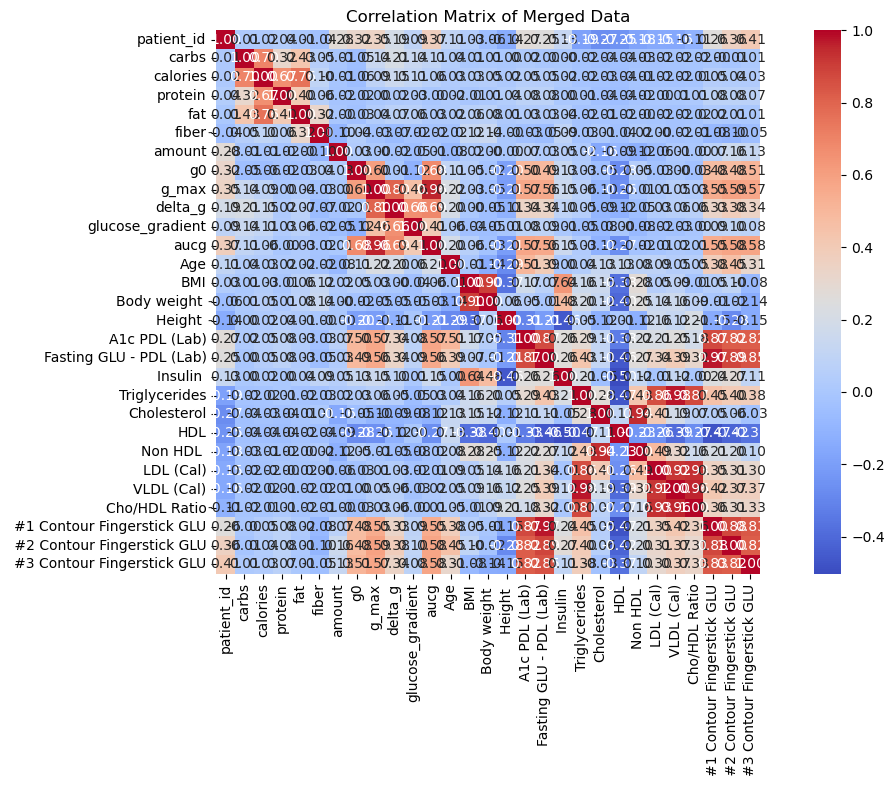

amount              6.402439
g_max               1.341463
delta_g             1.341463
glucose_gradient    1.341463
aucg                1.341463
g0                  1.036585
fiber               0.060976
calories            0.000000
meal_time           0.000000
patient_id          0.000000
dtype: float64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# merged_df의 기본 통계 요약 정보
stats_summary = merged_df.describe()

# 데이터 타입, 결측치 정보 포함한 통합 요약
info = merged_df.info()

# 결측치 비율 계산
missing_ratio = merged_df.isnull().mean().sort_values(ascending=False) * 100

# 변수 간의 상관계수 행렬 계산
correlation_matrix = merged_df.corr(numeric_only=True)

# 시각화를 위해 상관행렬 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Merged Data")
plt.tight_layout()
plt.show()

missing_ratio.head(10)


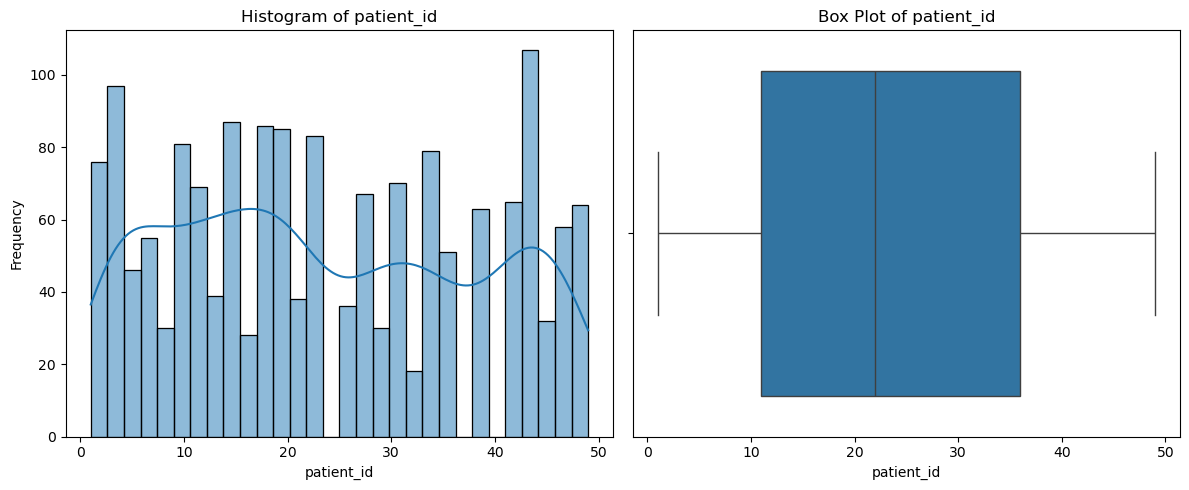


📊 Statistics for patient_id:
Skewness: 0.16
Number of Missing Values: 0


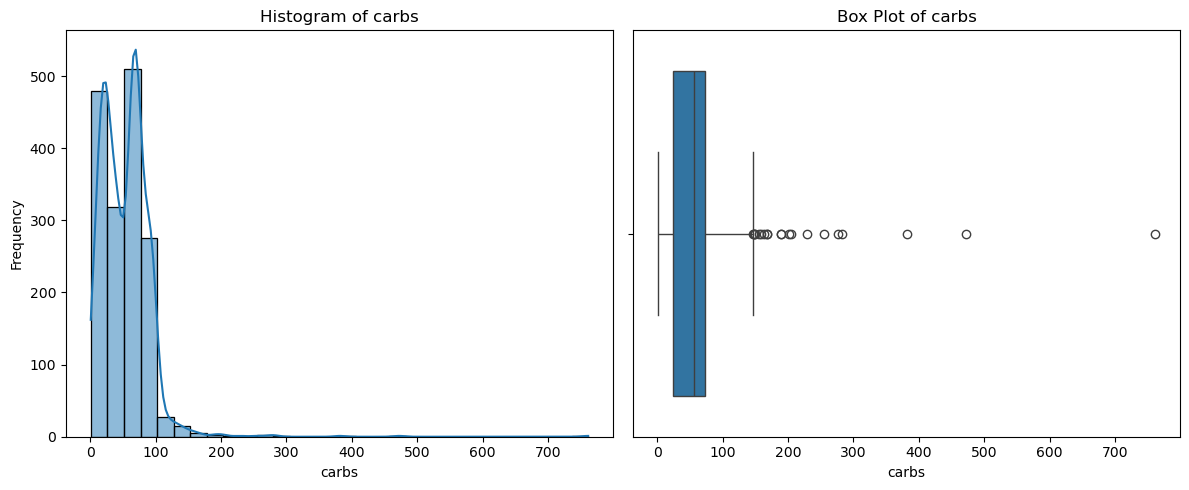


📊 Statistics for carbs:
Skewness: 5.14
Number of Missing Values: 0


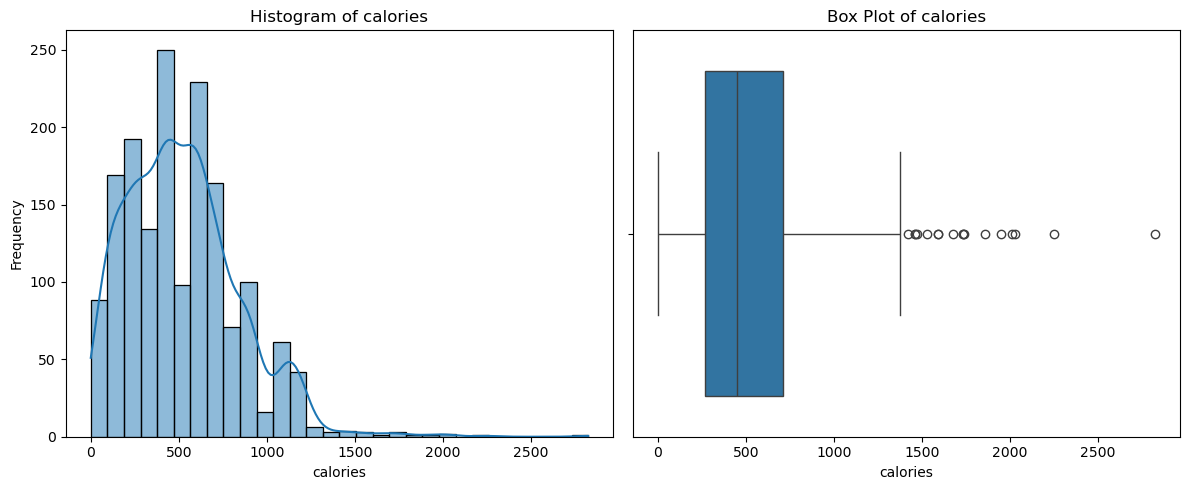


📊 Statistics for calories:
Skewness: 1.03
Number of Missing Values: 0


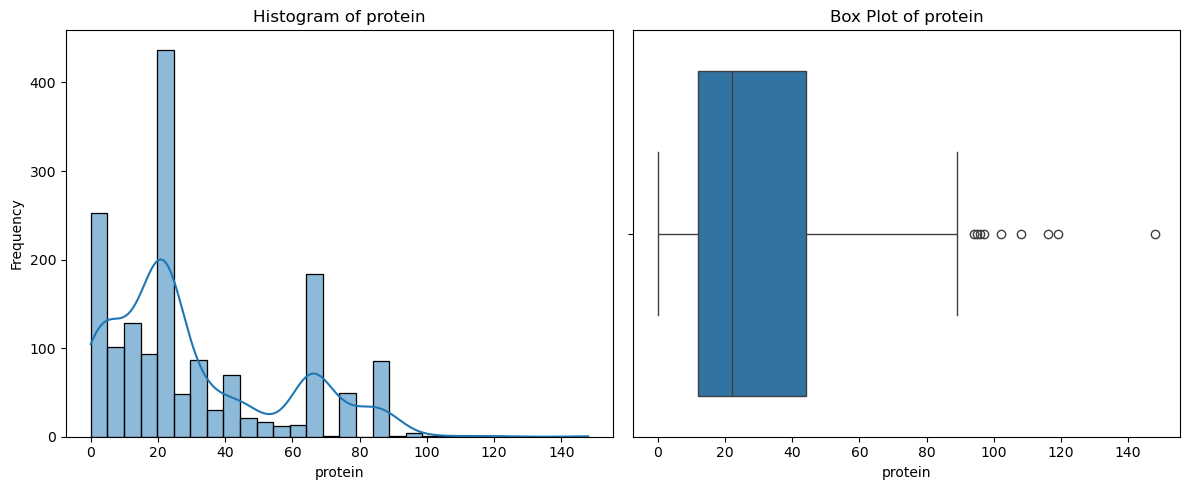


📊 Statistics for protein:
Skewness: 0.93
Number of Missing Values: 0


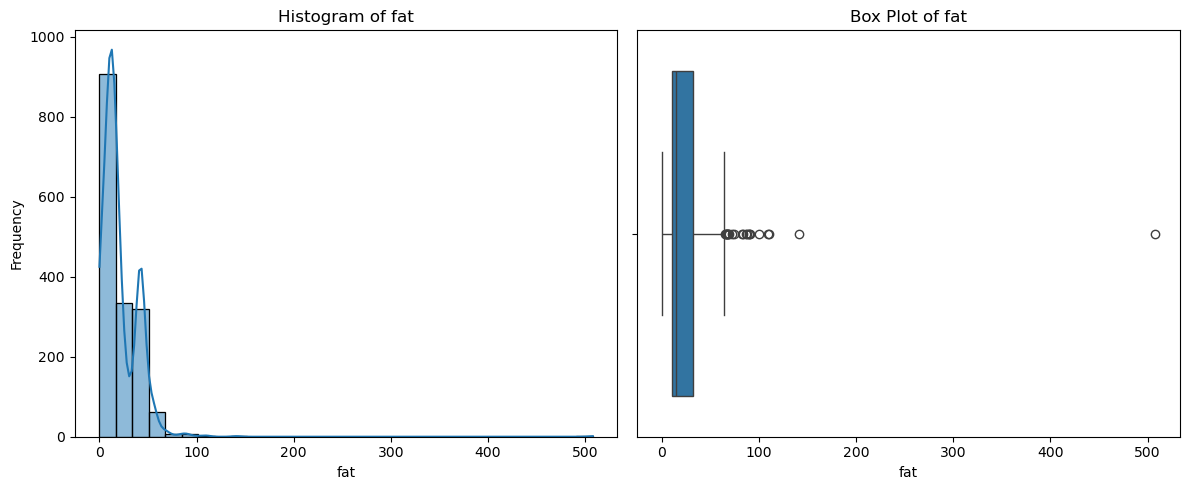


📊 Statistics for fat:
Skewness: 8.55
Number of Missing Values: 0


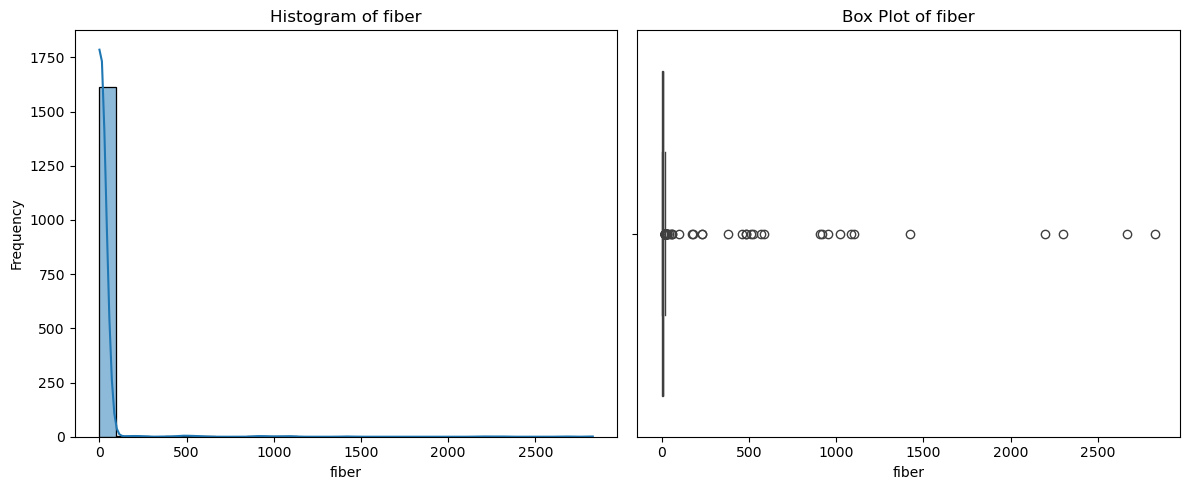


📊 Statistics for fiber:
Skewness: 14.19
Number of Missing Values: 1


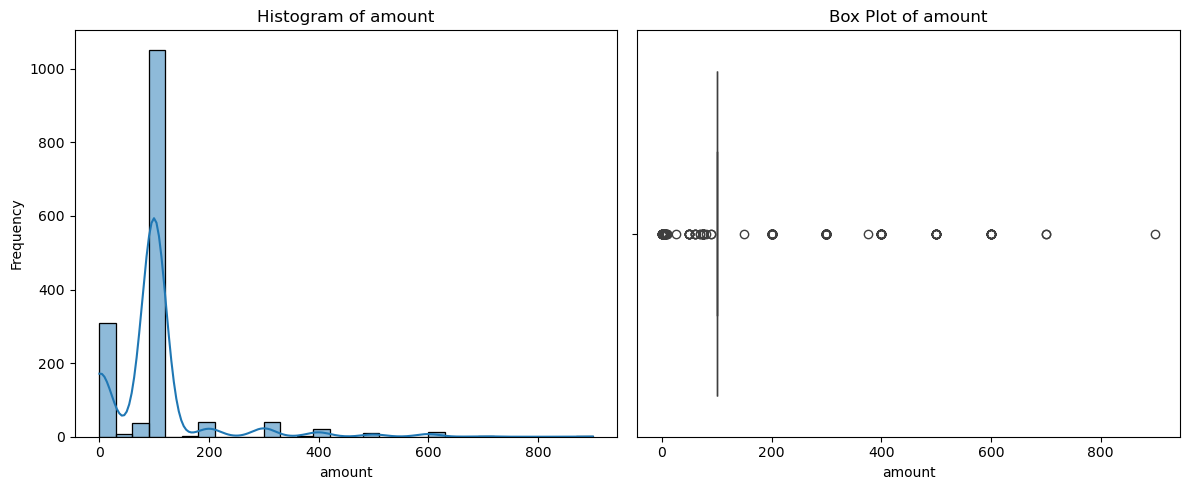


📊 Statistics for amount:
Skewness: 3.15
Number of Missing Values: 105


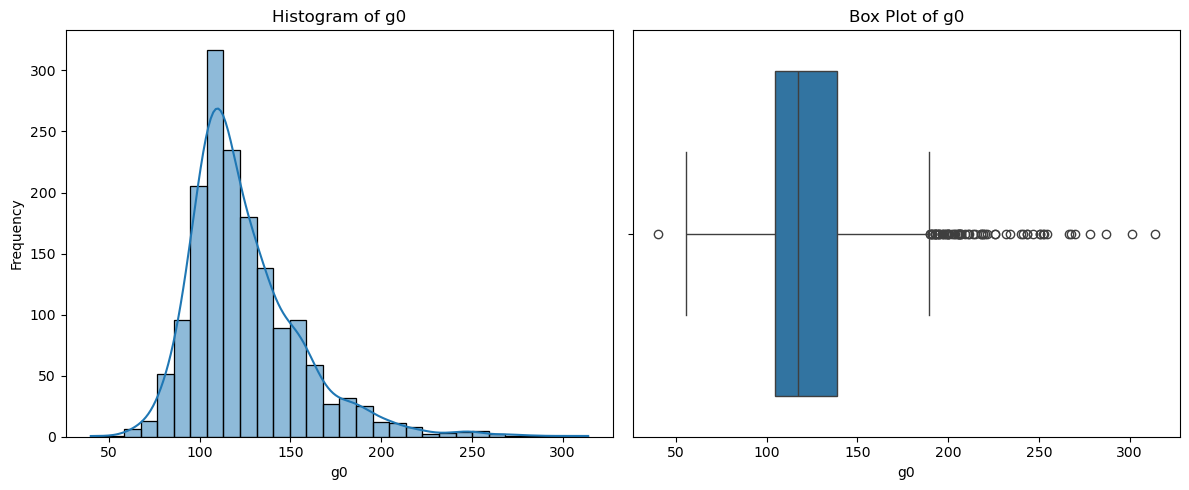


📊 Statistics for g0:
Skewness: 1.53
Number of Missing Values: 17


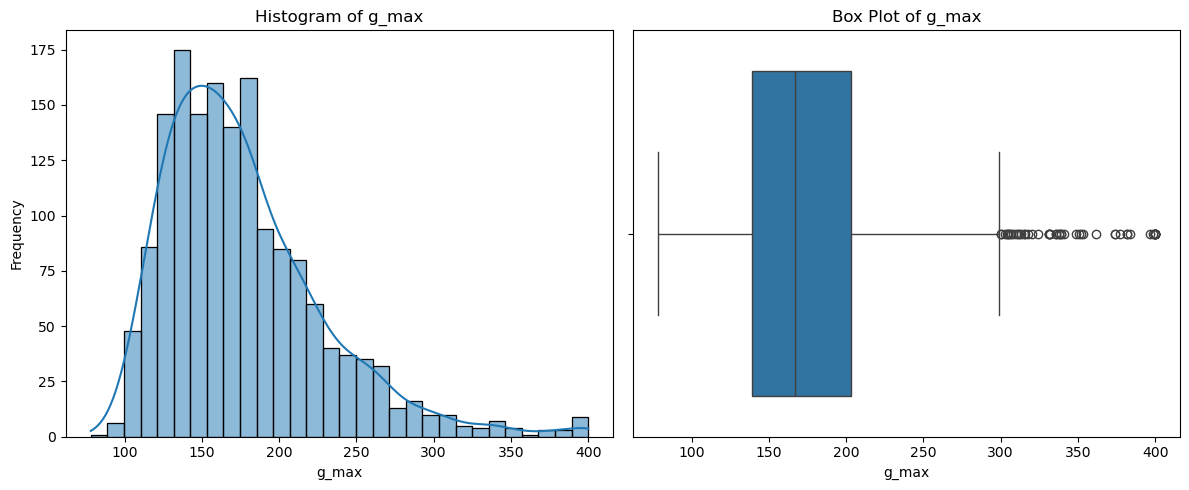


📊 Statistics for g_max:
Skewness: 1.33
Number of Missing Values: 22


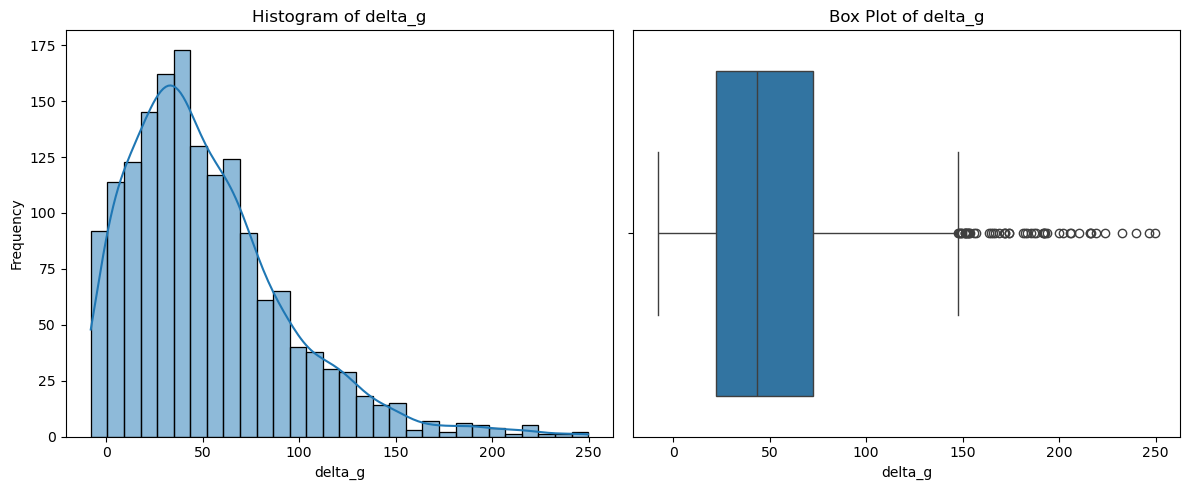


📊 Statistics for delta_g:
Skewness: 1.26
Number of Missing Values: 22


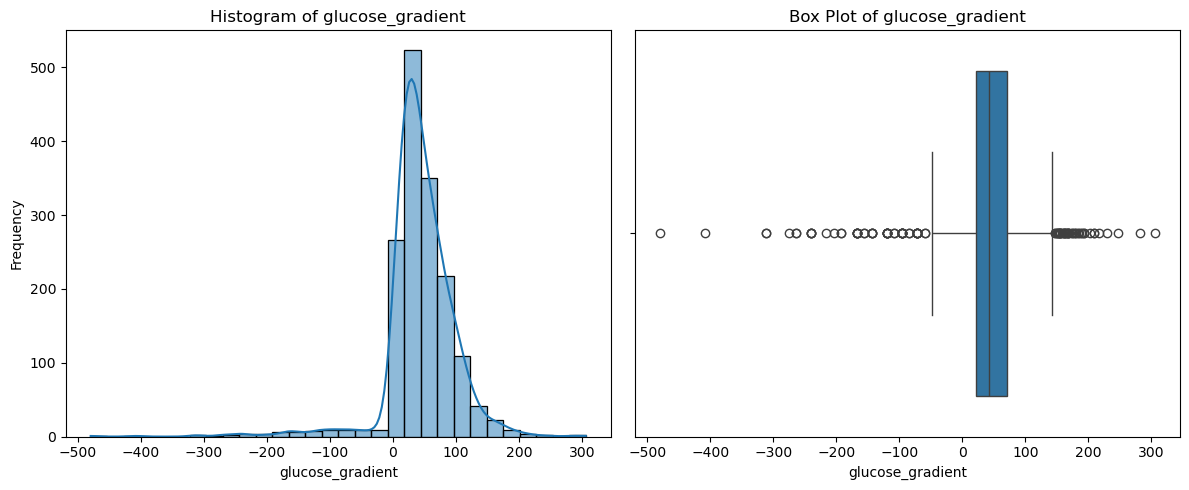


📊 Statistics for glucose_gradient:
Skewness: -1.96
Number of Missing Values: 22


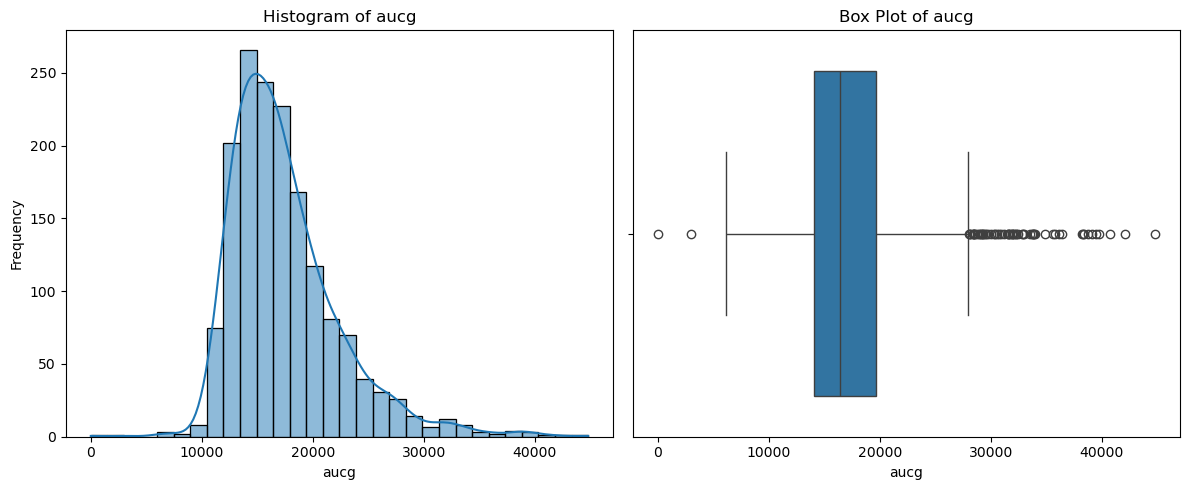


📊 Statistics for aucg:
Skewness: 1.42
Number of Missing Values: 22


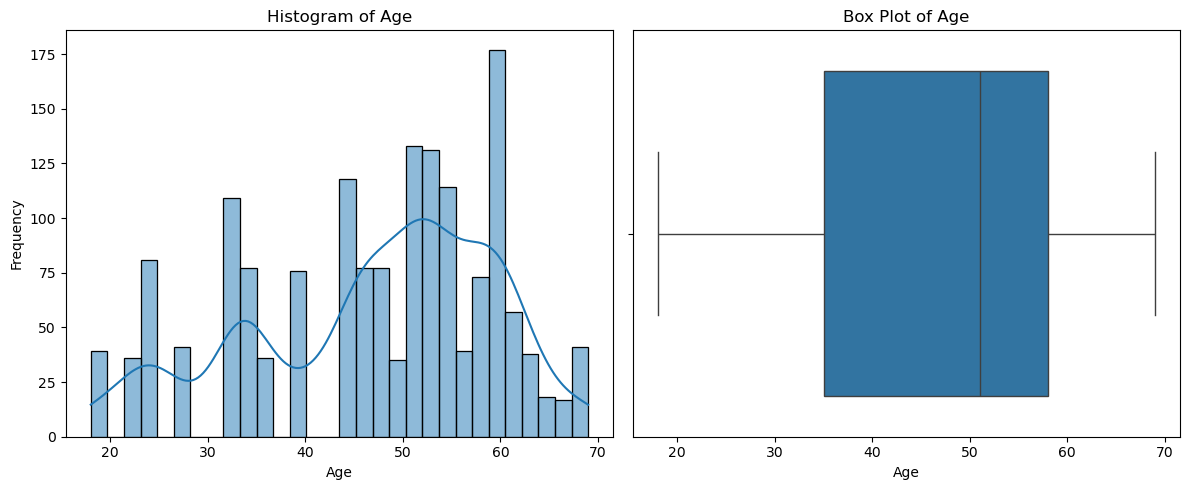


📊 Statistics for Age:
Skewness: -0.56
Number of Missing Values: 0


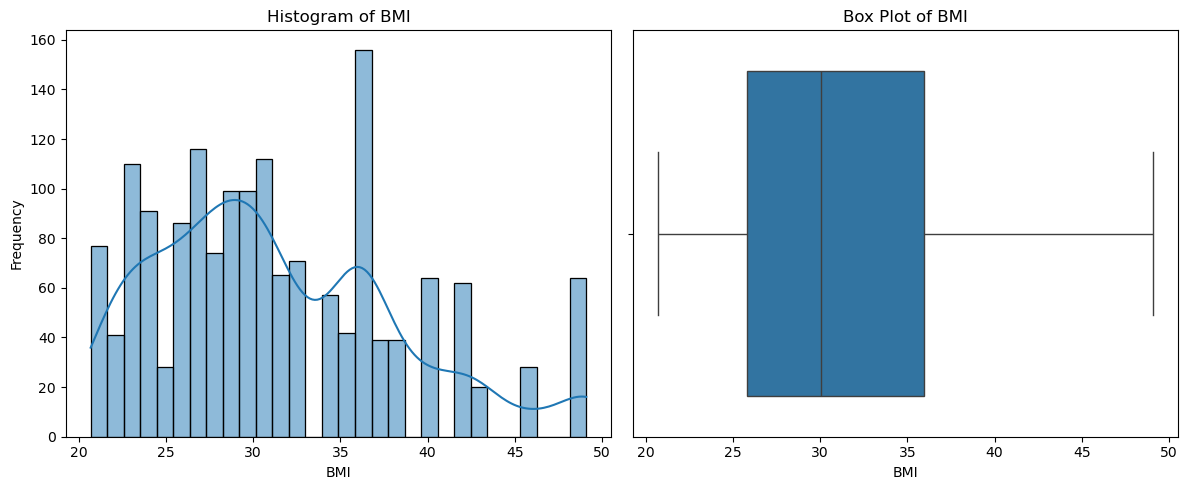


📊 Statistics for BMI:
Skewness: 0.67
Number of Missing Values: 0


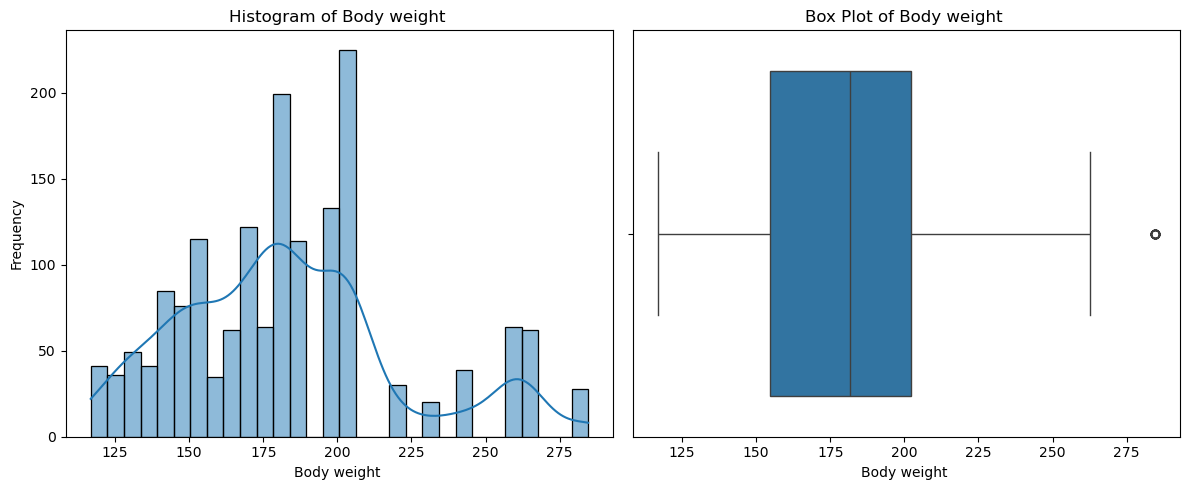


📊 Statistics for Body weight :
Skewness: 0.64
Number of Missing Values: 0


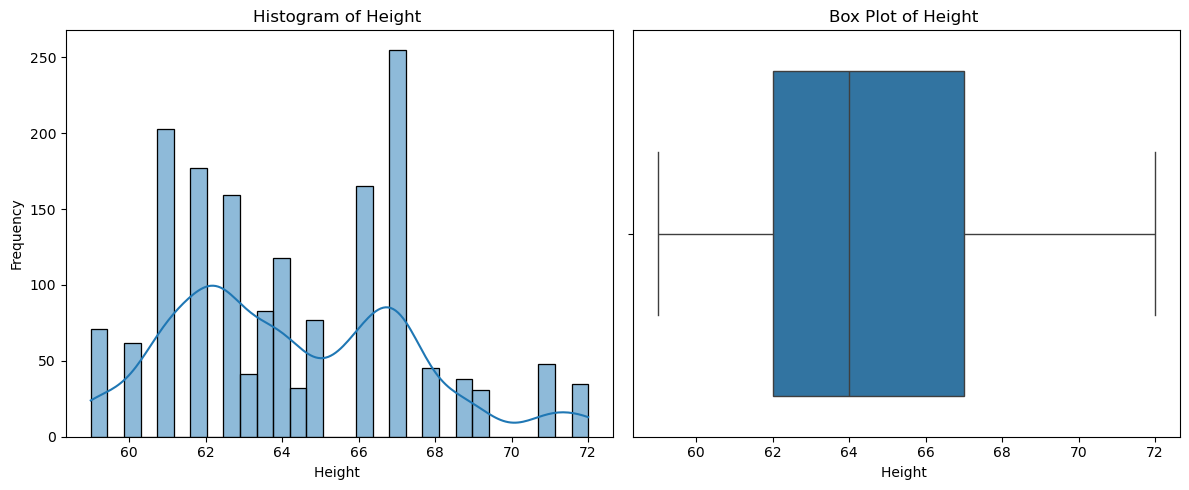


📊 Statistics for Height :
Skewness: 0.44
Number of Missing Values: 0


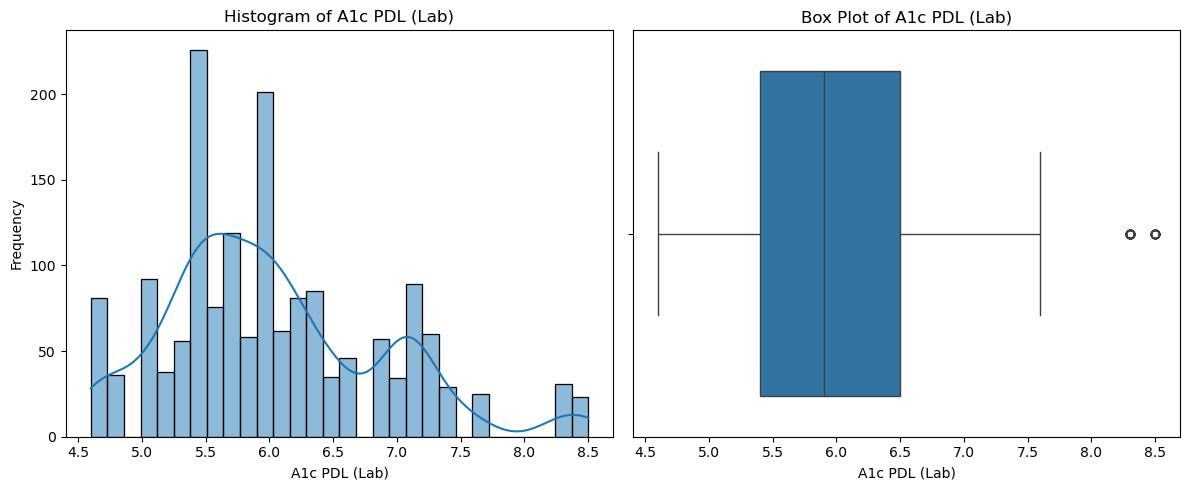


📊 Statistics for A1c PDL (Lab):
Skewness: 0.72
Number of Missing Values: 0


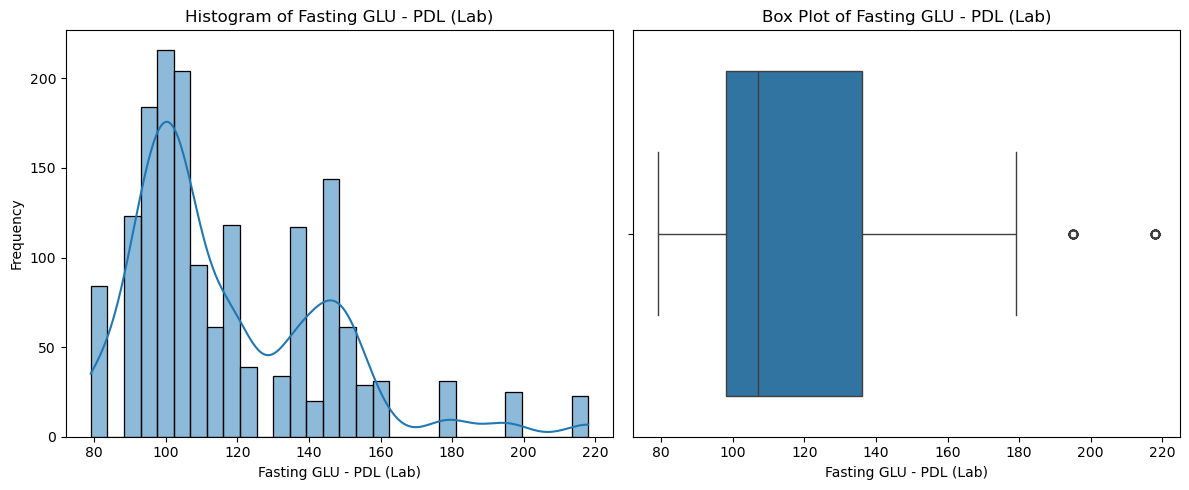


📊 Statistics for Fasting GLU - PDL (Lab):
Skewness: 1.21
Number of Missing Values: 0


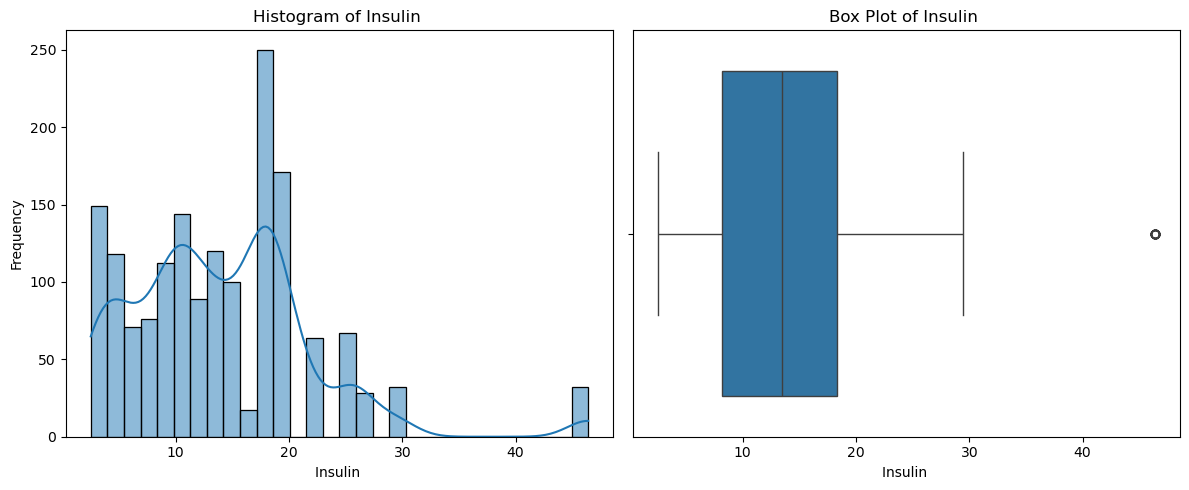


📊 Statistics for Insulin :
Skewness: 1.25
Number of Missing Values: 0


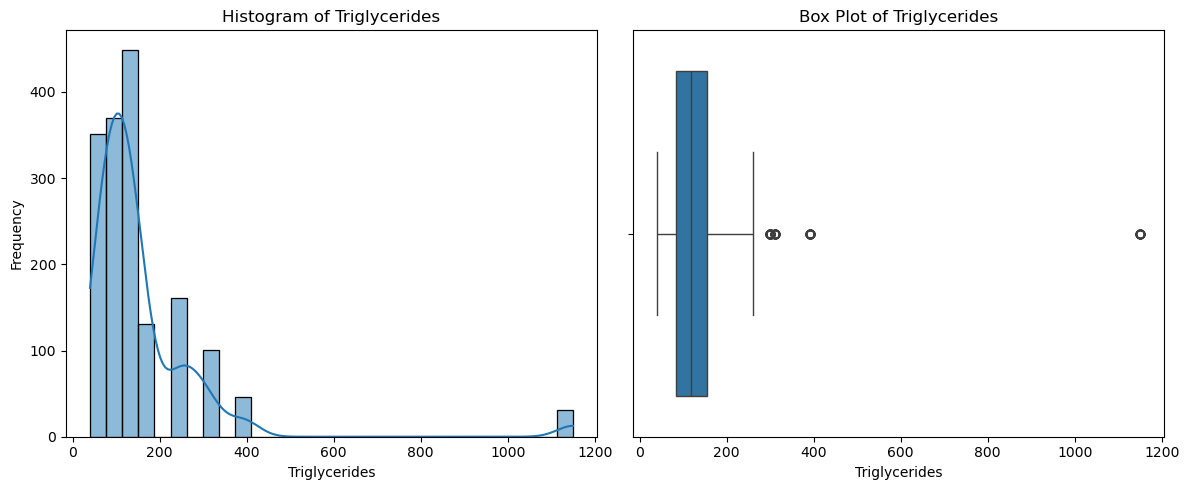


📊 Statistics for Triglycerides:
Skewness: 4.64
Number of Missing Values: 0


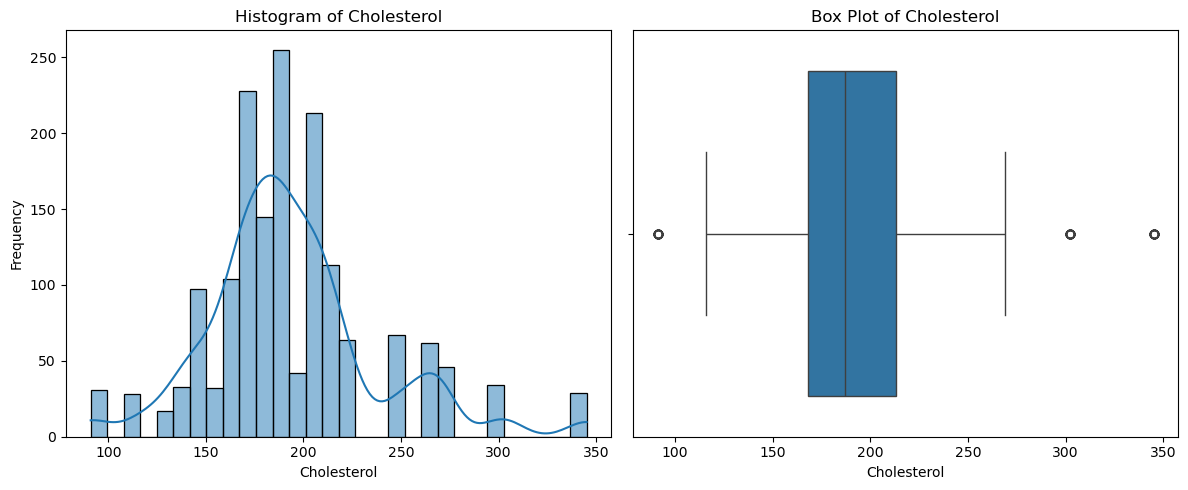


📊 Statistics for Cholesterol:
Skewness: 0.84
Number of Missing Values: 0


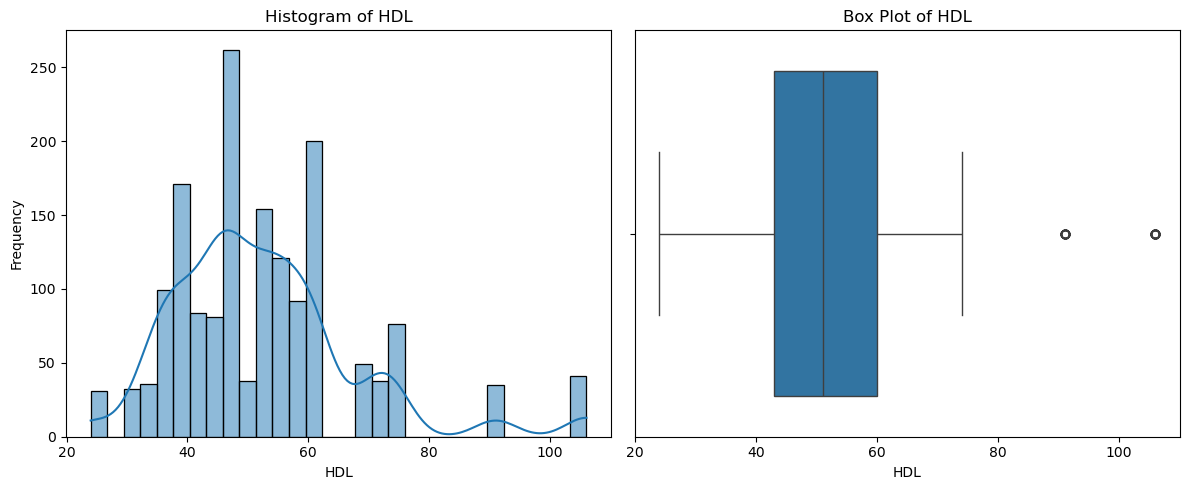


📊 Statistics for HDL:
Skewness: 1.26
Number of Missing Values: 0


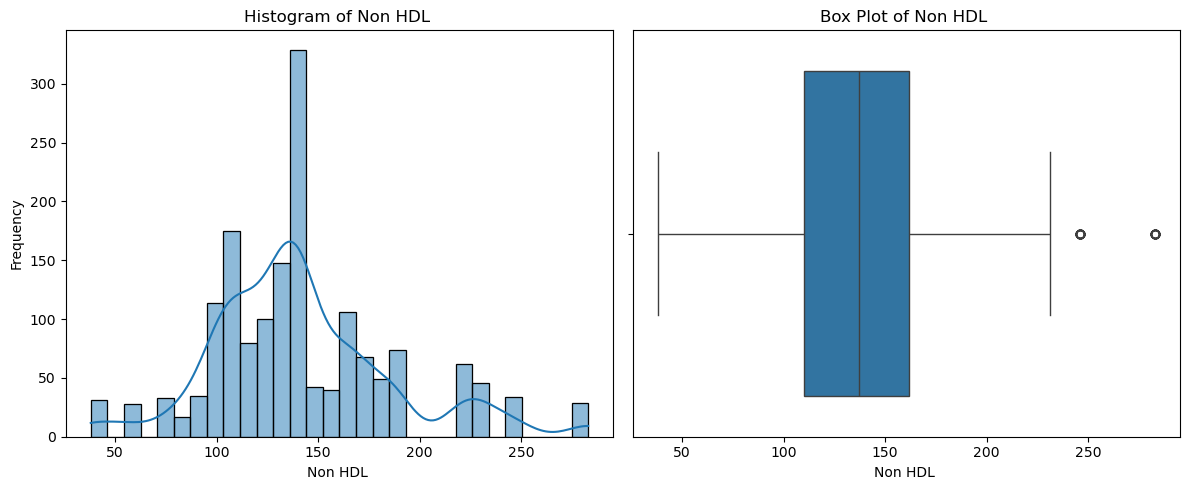


📊 Statistics for Non HDL :
Skewness: 0.73
Number of Missing Values: 0


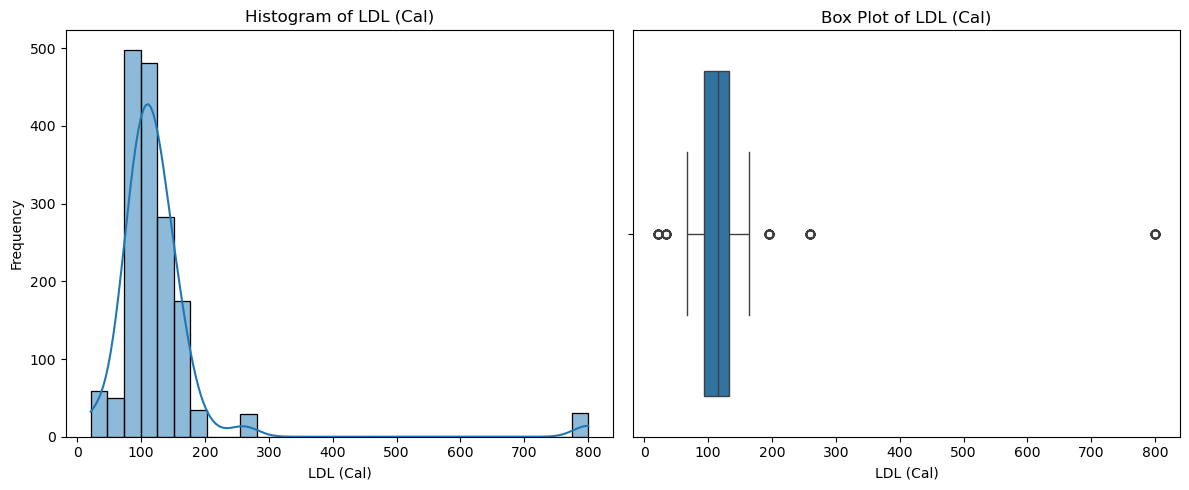


📊 Statistics for LDL (Cal):
Skewness: 5.63
Number of Missing Values: 0


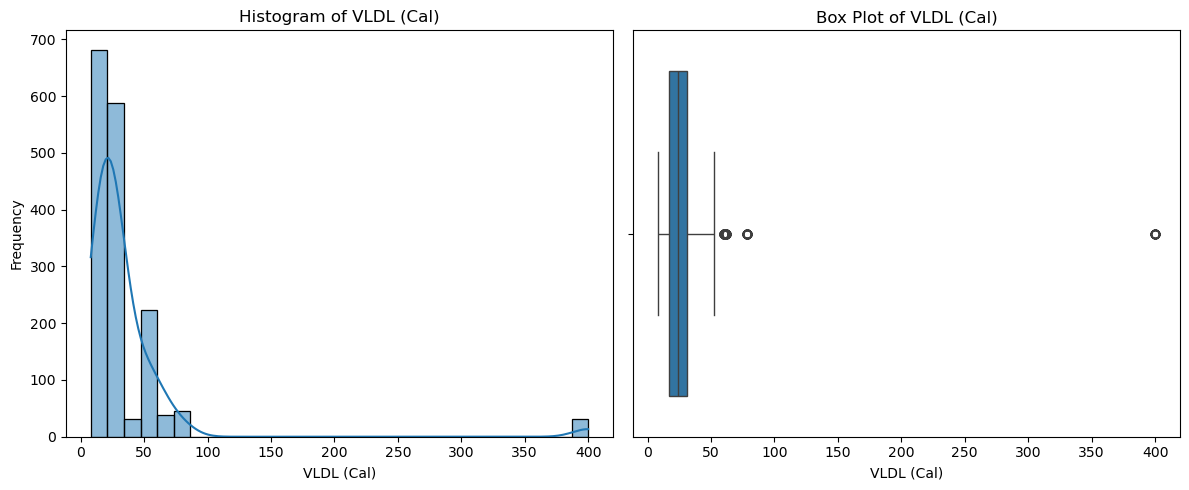


📊 Statistics for VLDL (Cal):
Skewness: 6.13
Number of Missing Values: 0


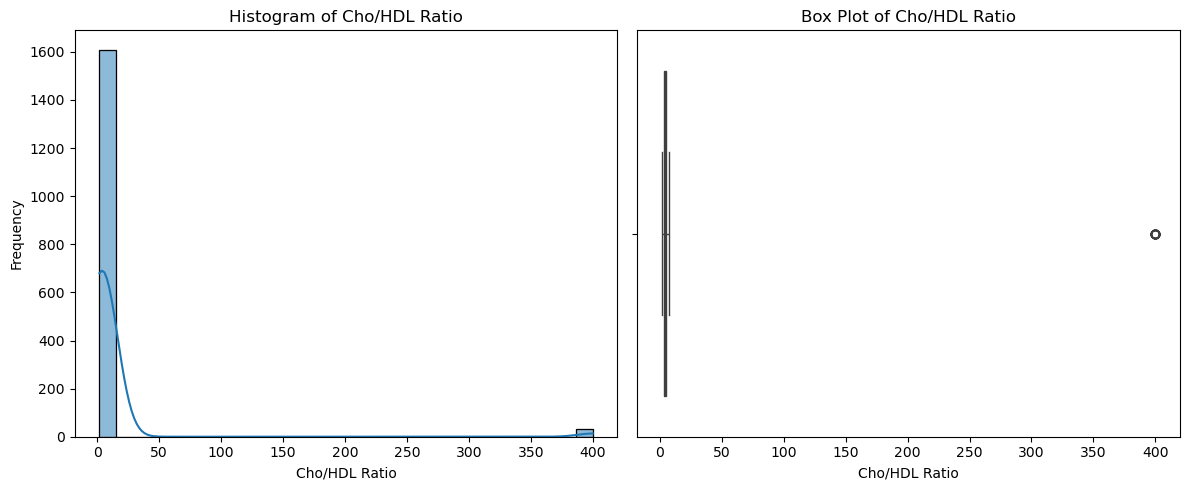


📊 Statistics for Cho/HDL Ratio:
Skewness: 7.07
Number of Missing Values: 0


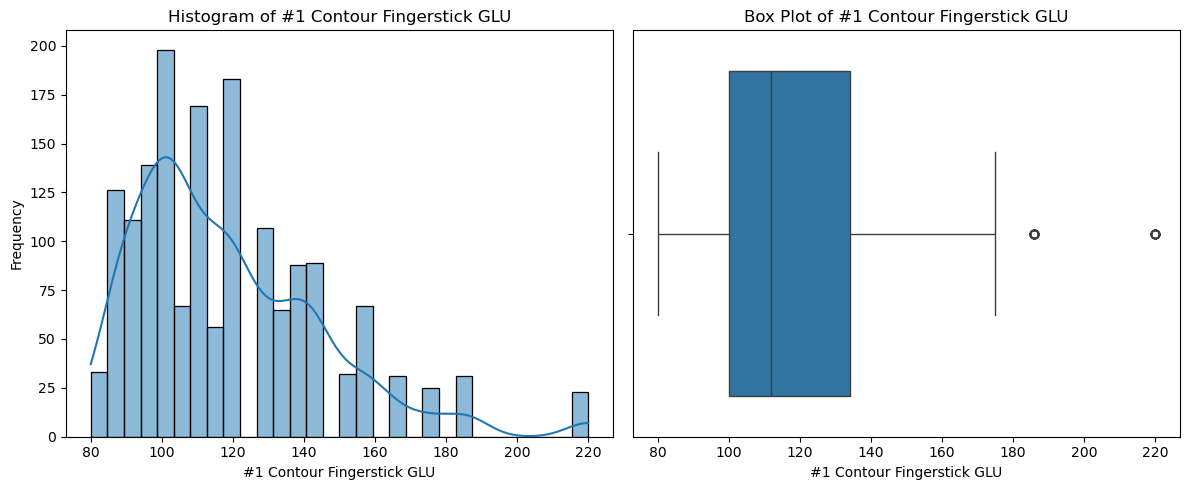


📊 Statistics for #1 Contour Fingerstick GLU:
Skewness: 1.20
Number of Missing Values: 0


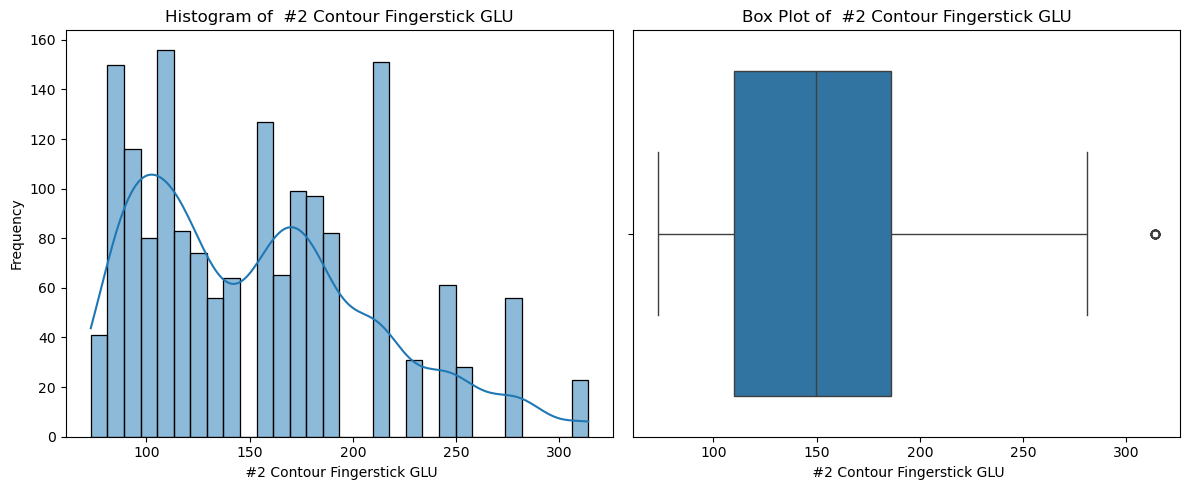


📊 Statistics for  #2 Contour Fingerstick GLU:
Skewness: 0.67
Number of Missing Values: 0


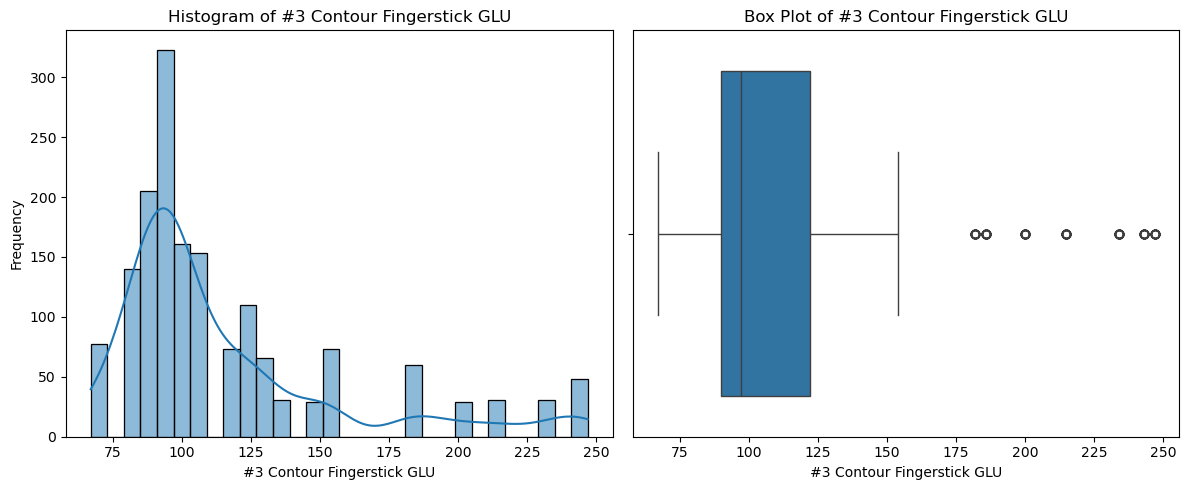


📊 Statistics for #3 Contour Fingerstick GLU:
Skewness: 1.68
Number of Missing Values: 0


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수 목록 (merged_df 기준)
numeric_columns = merged_df.select_dtypes(include=["number"]).columns.tolist()


# 각 수치형 변수에 대해 히스토그램 + 박스플롯 시각화
for feature in numeric_columns:
    plt.figure(figsize=(12, 5))

    # 히스토그램 + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df[feature].dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_df[feature].dropna())
    plt.title(f"Box Plot of {feature}")

    plt.tight_layout()
    plt.show()

    # 왜도 및 결측값 수 출력
    skewness = merged_df[feature].skew()
    missing = merged_df[feature].isnull().sum()
    print(f"\n📊 Statistics for {feature}:")
    print(f"Skewness: {skewness:.2f}")
    print(f"Number of Missing Values: {missing}")


diabetes_status                       Normal  Pre-diabetes         T2D
patient_id                 count  605.000000    606.000000  429.000000
                           mean    19.373554     24.597360   28.177156
                           std     13.098934     13.574268   15.861737
                           min      1.000000      7.000000    3.000000
                           25%      6.000000     11.000000   12.000000
...                                      ...           ...         ...
#3 Contour Fingerstick GLU min     67.000000     80.000000   98.000000
                           25%     81.000000     92.000000  130.000000
                           50%     90.000000    104.000000  154.000000
                           75%     97.000000    115.000000  215.000000
                           max    135.000000    151.000000  247.000000

[232 rows x 3 columns]

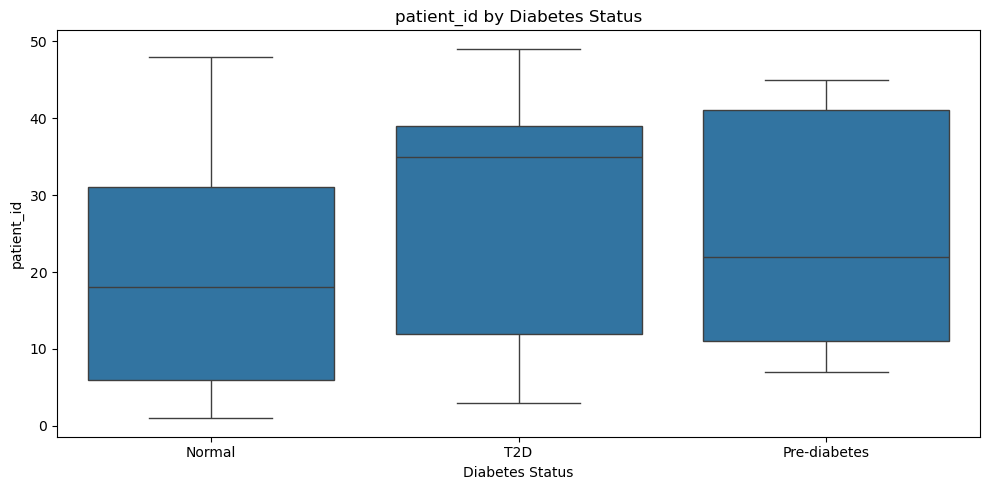

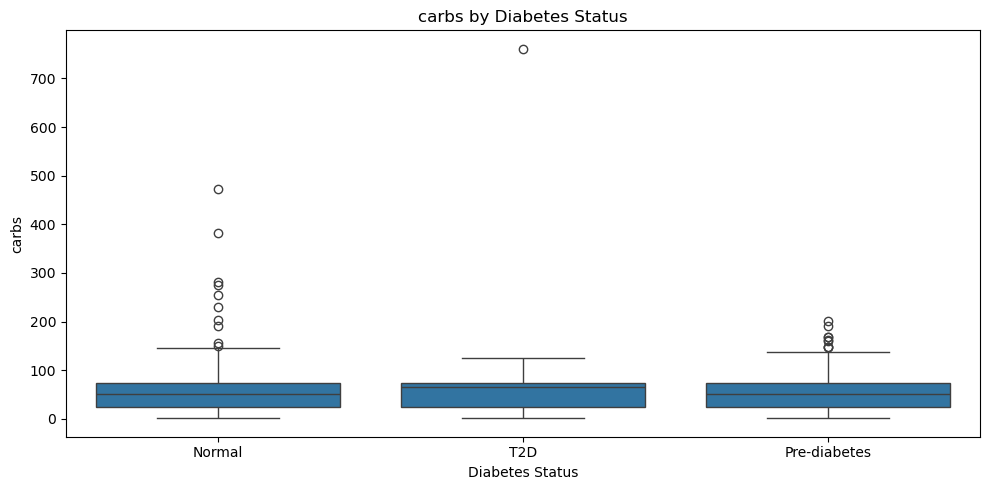

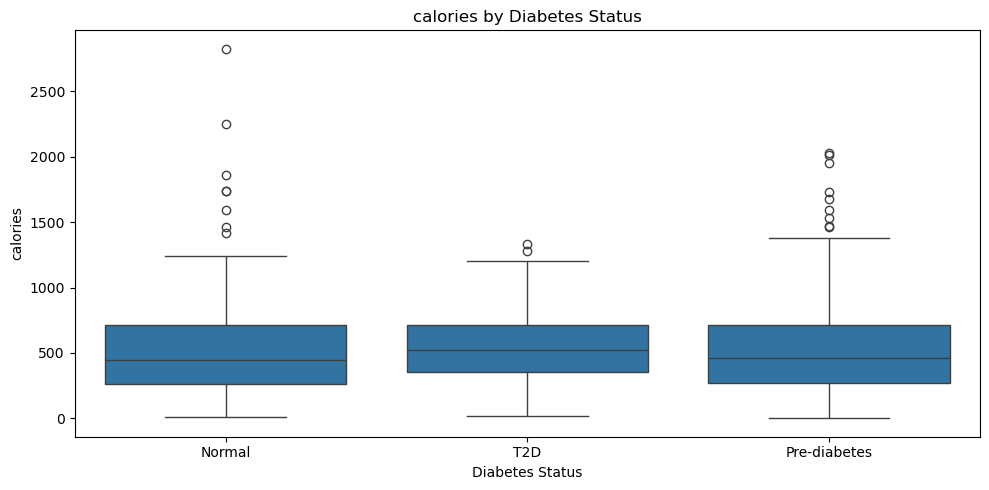

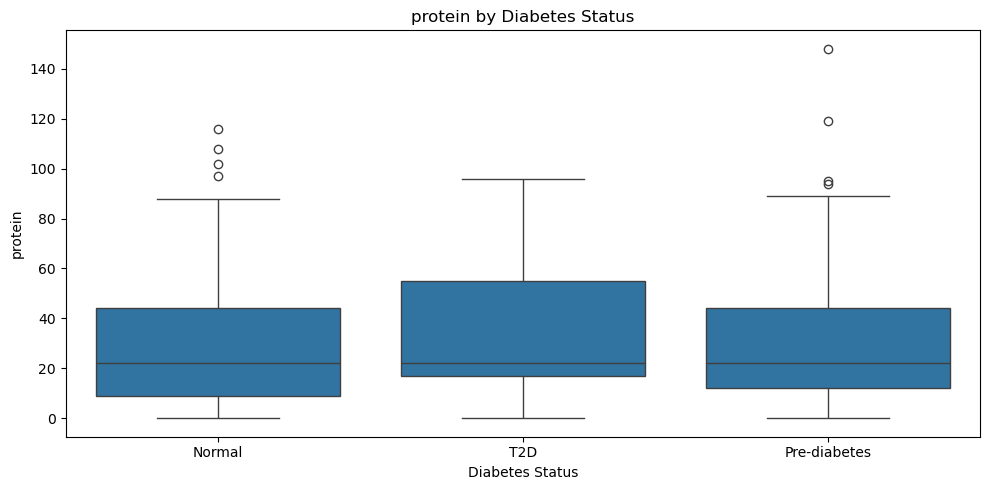

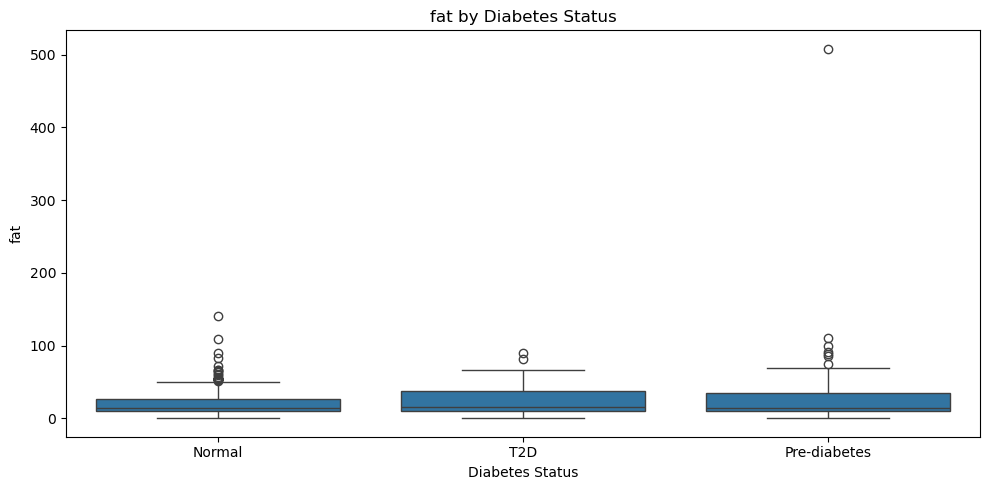

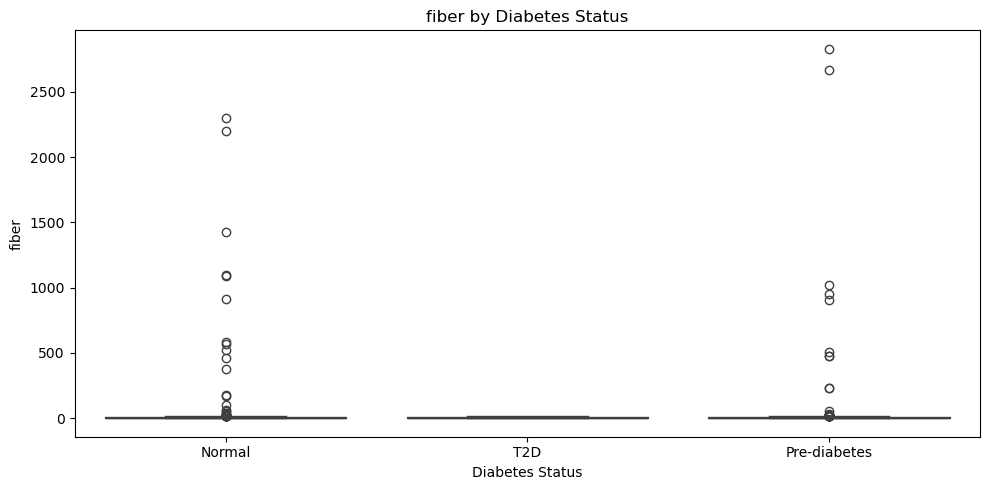

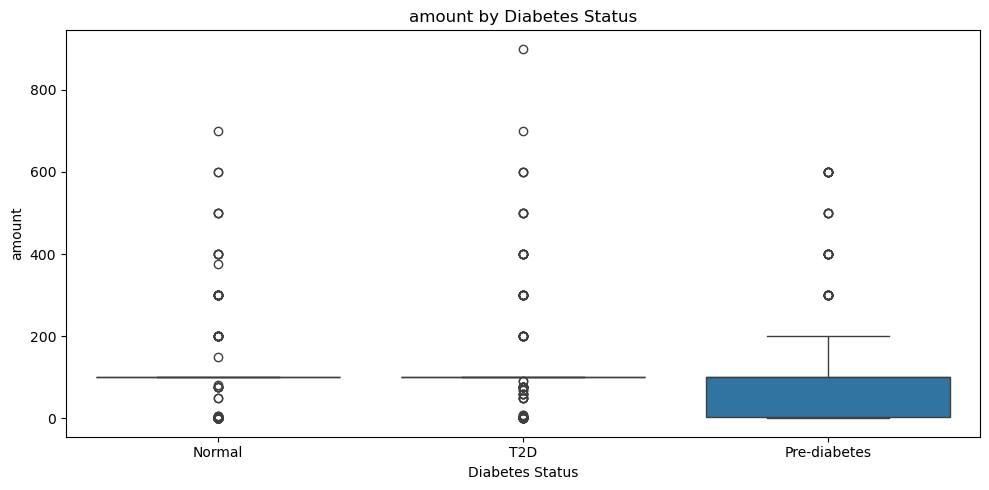

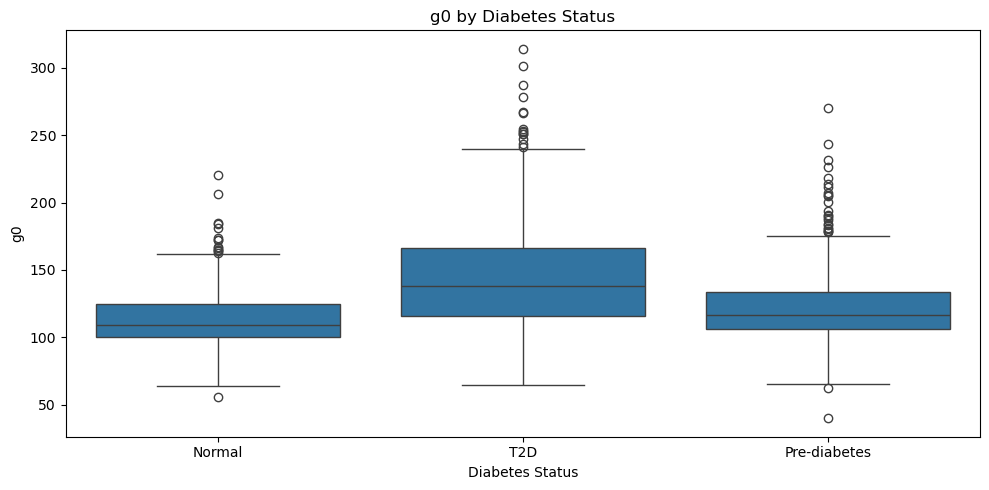

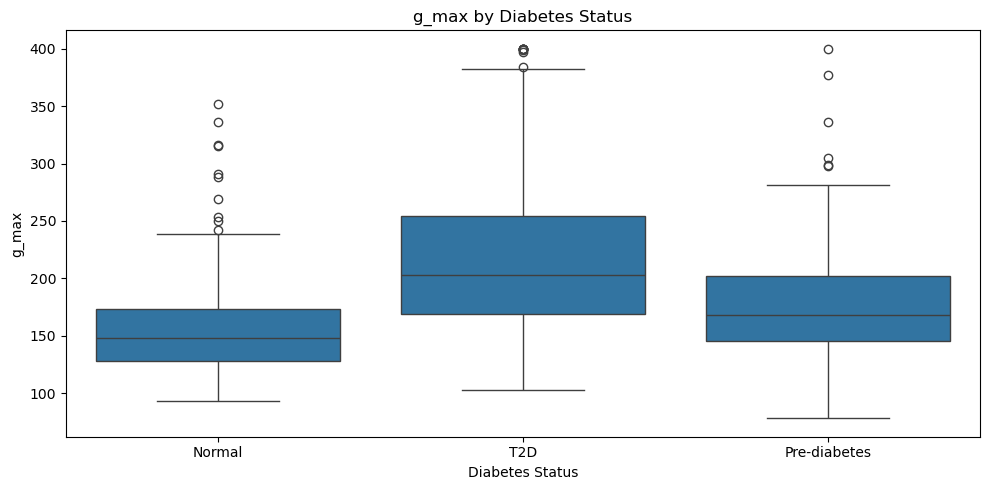

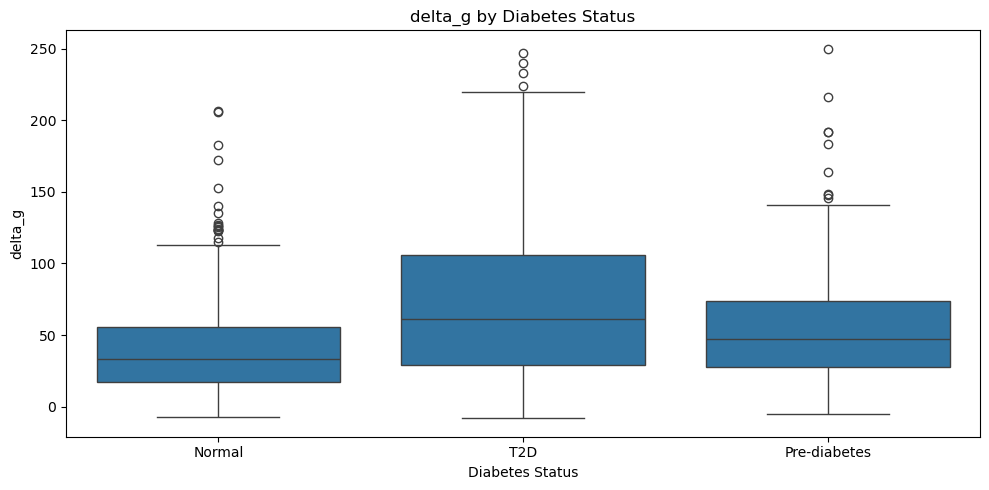

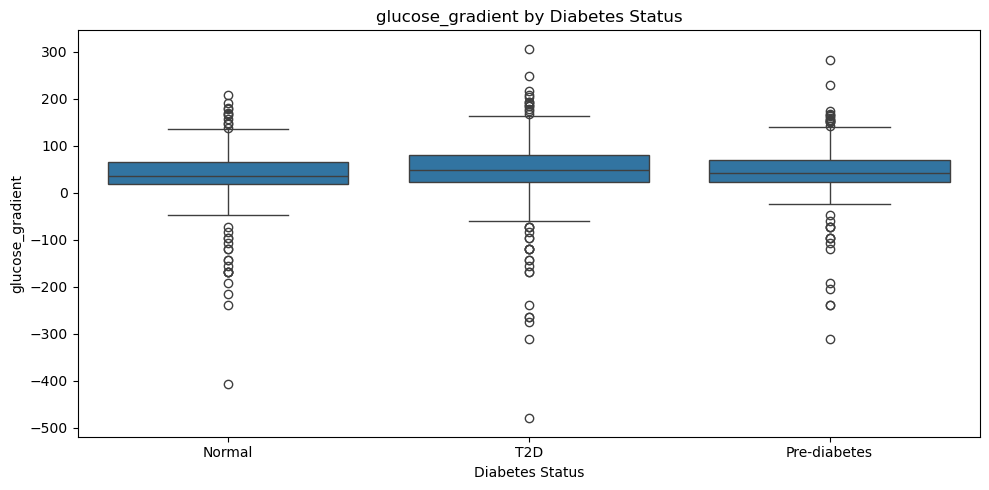

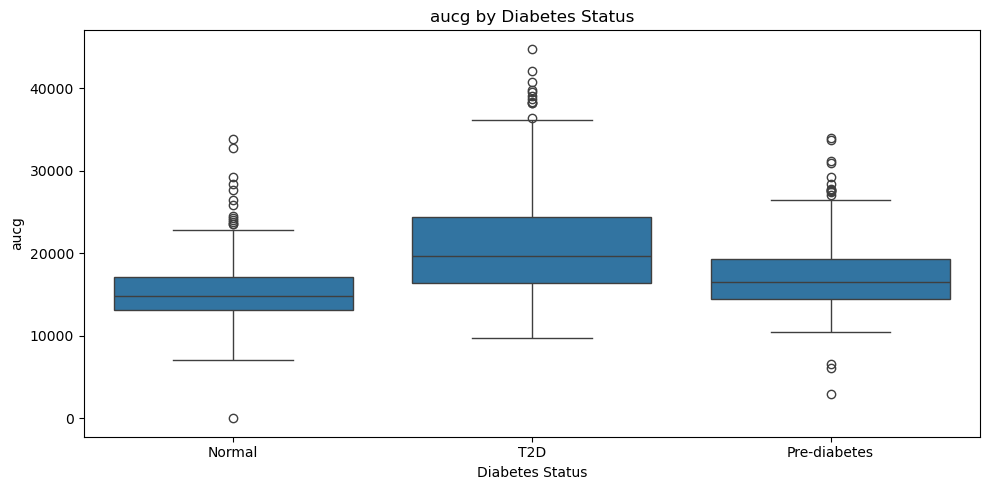

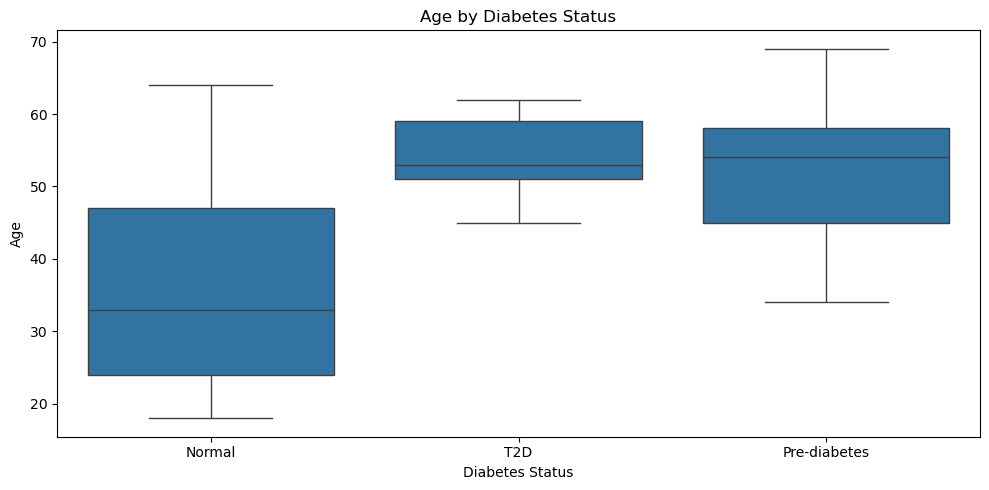

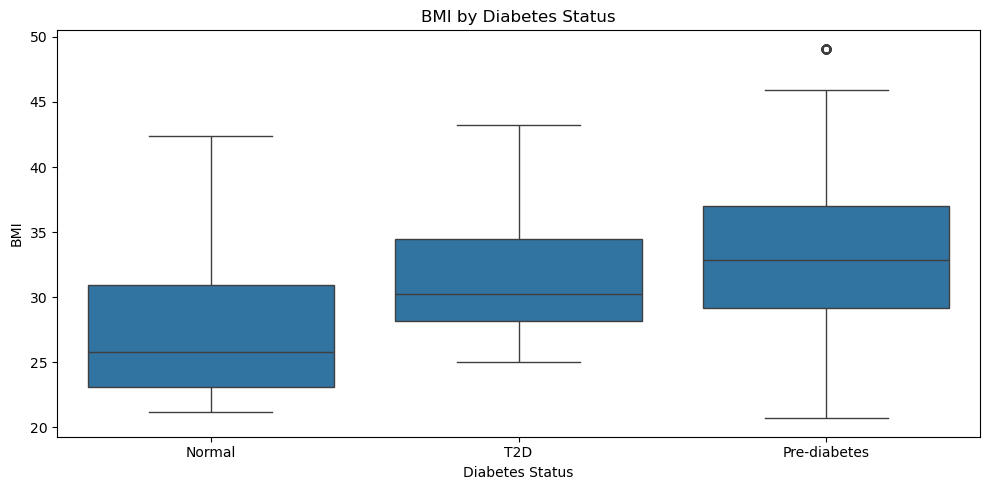

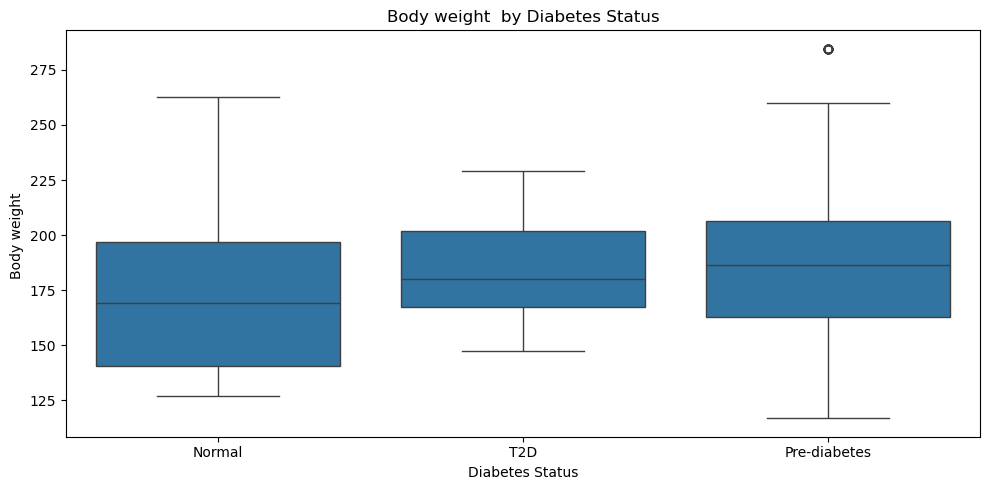

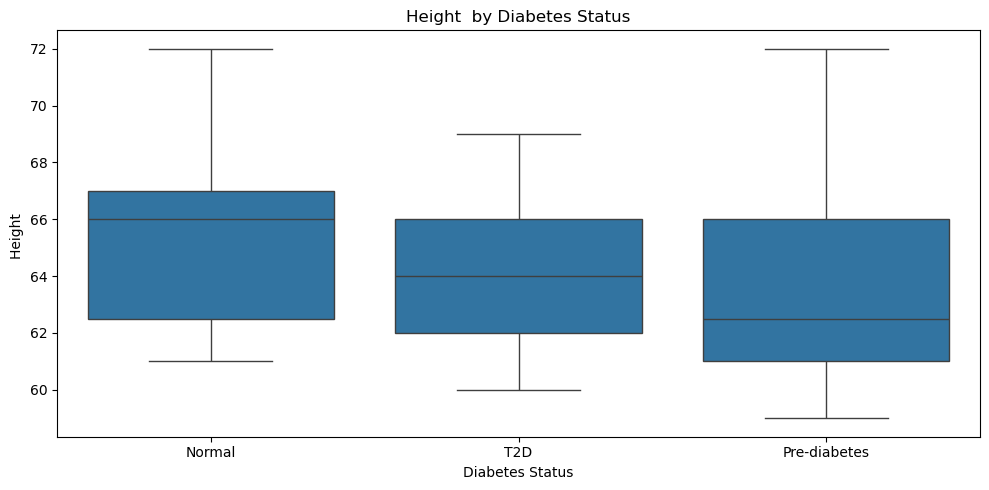

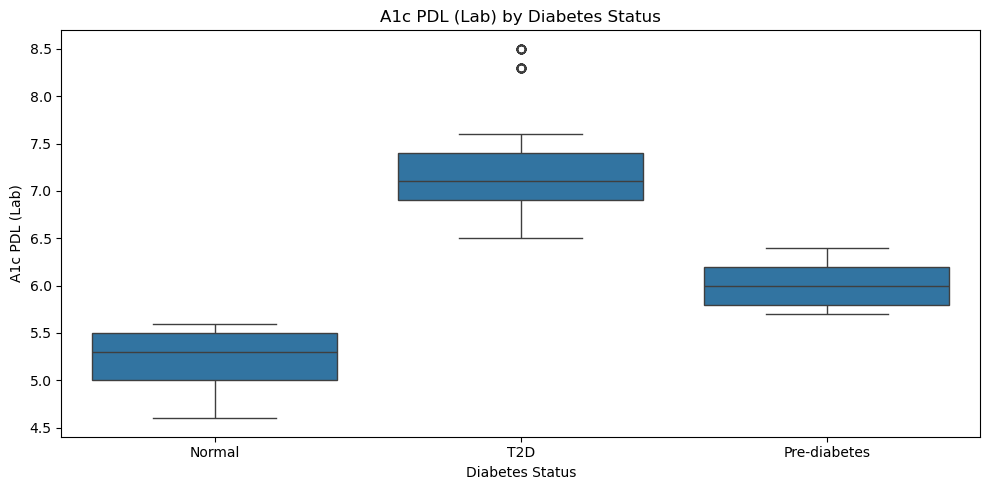

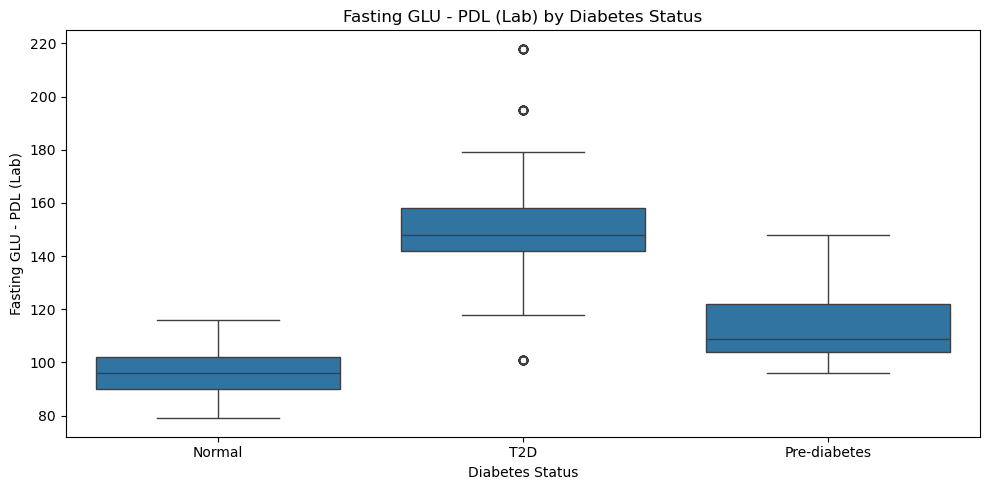

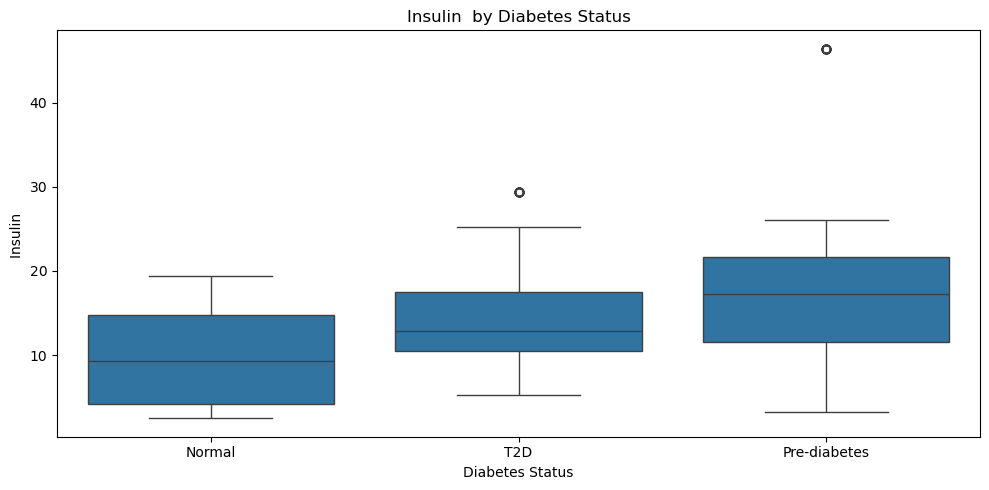

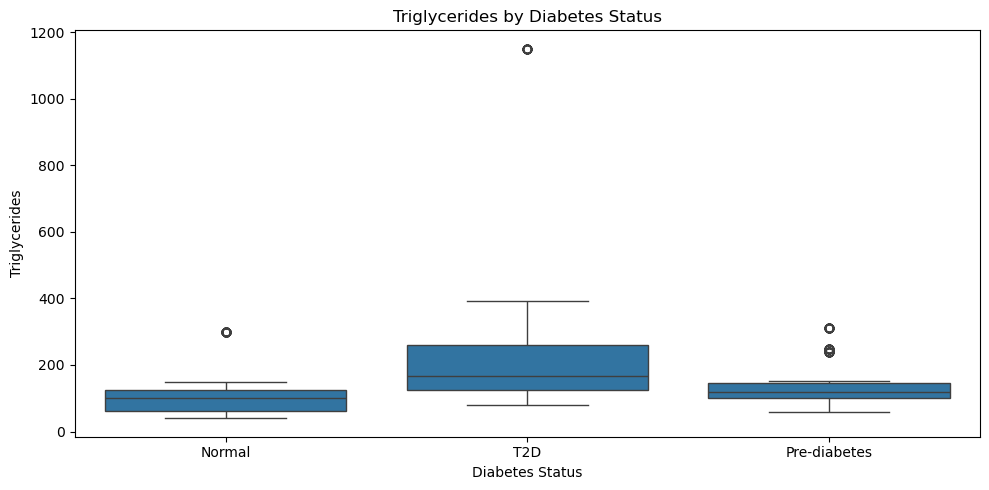

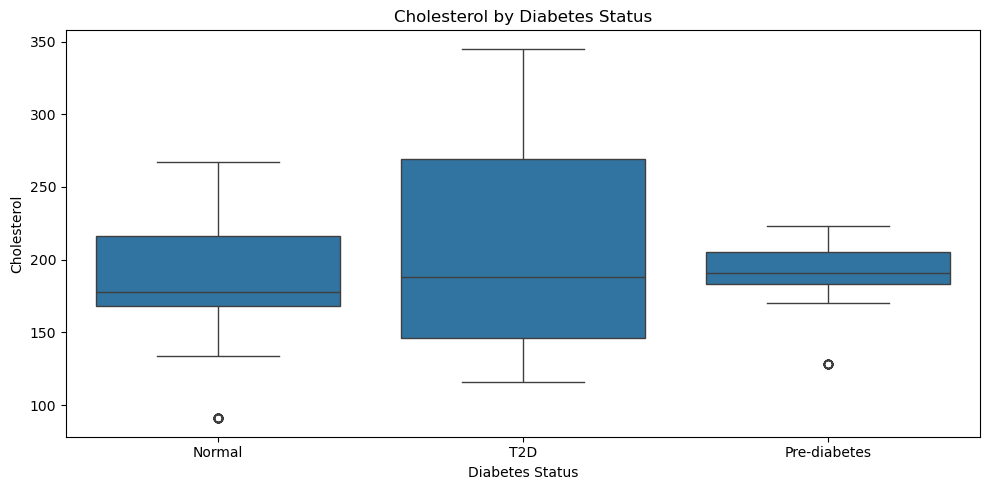

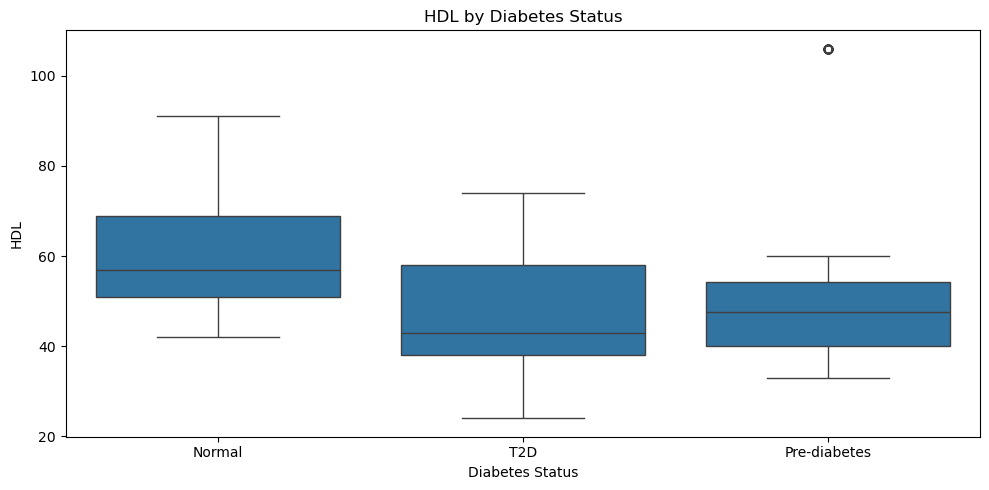

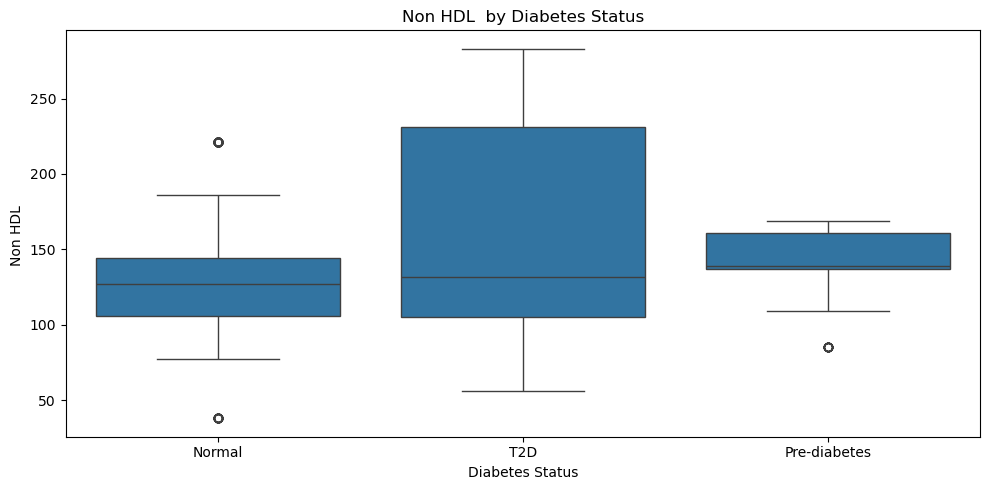

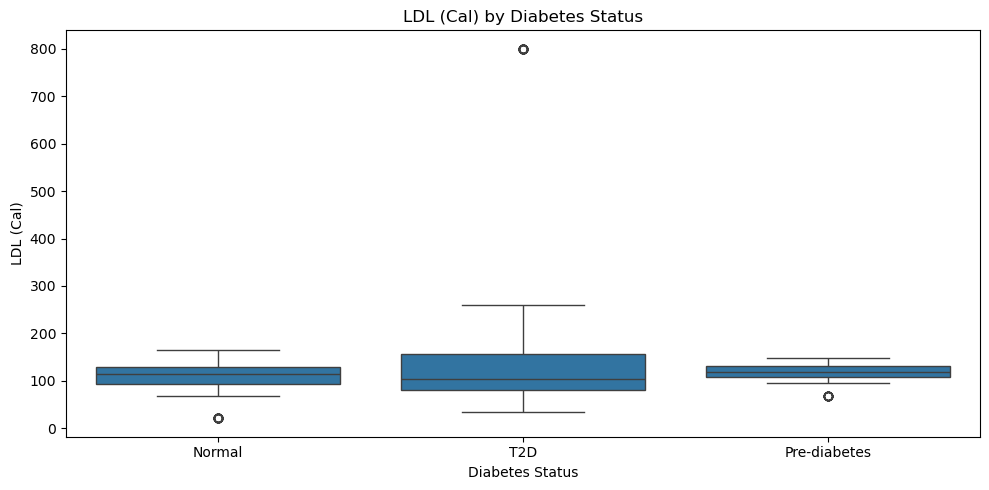

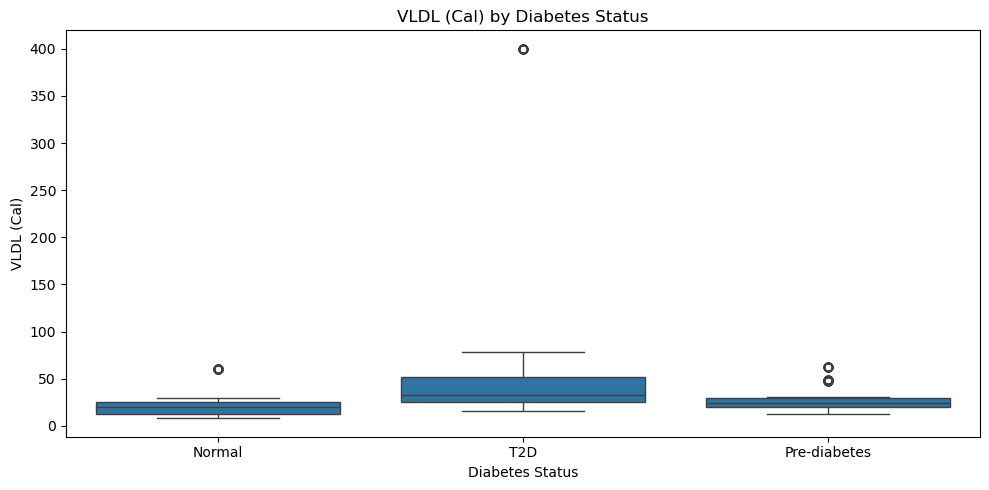

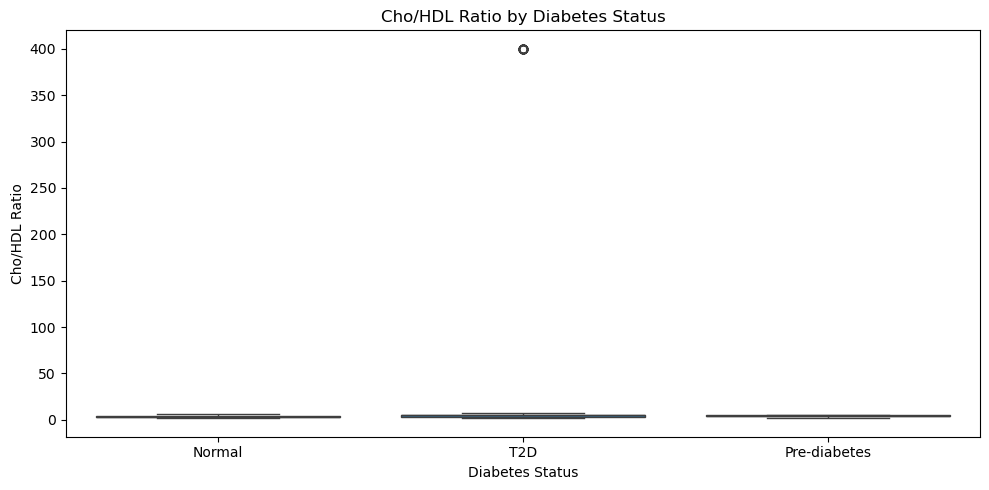

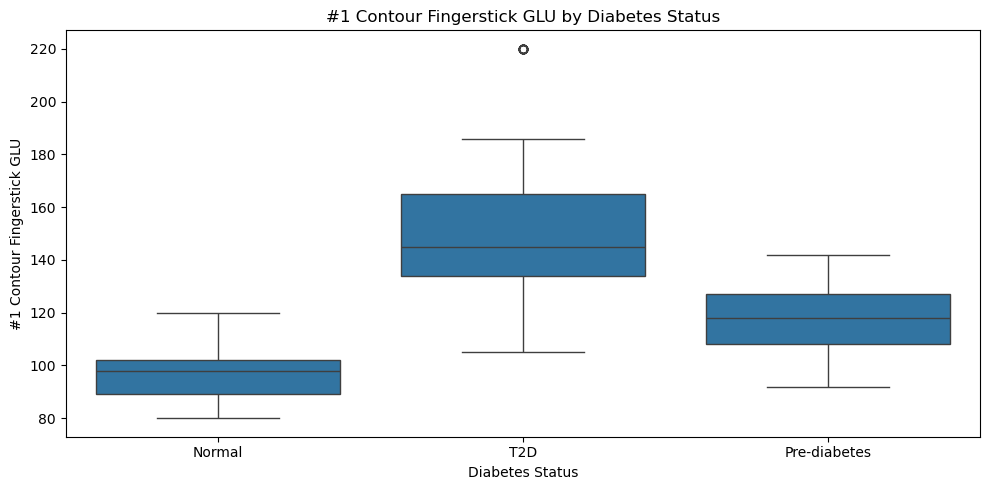

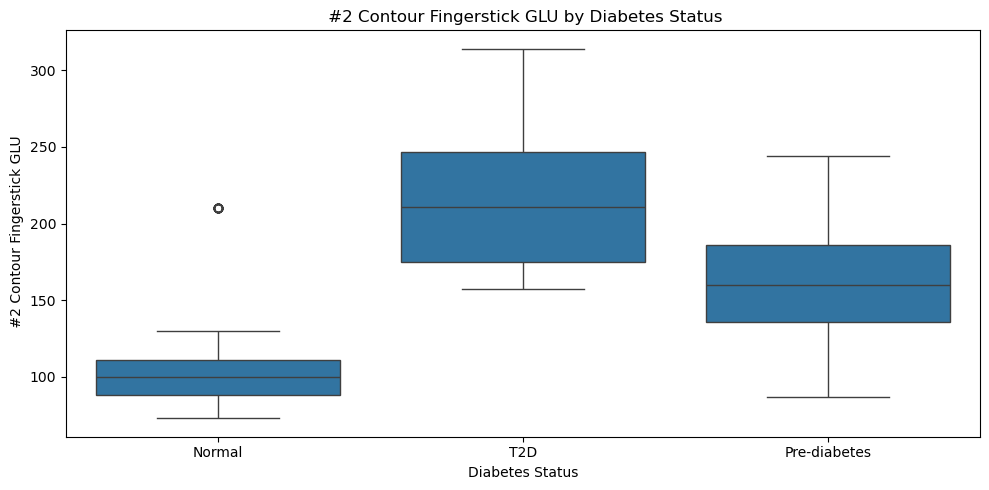

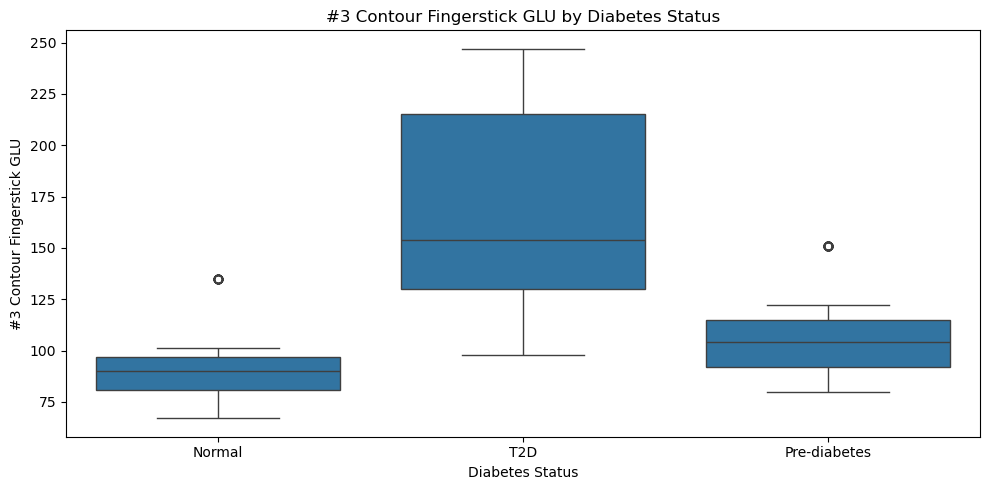

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A1c 수치를 기반으로 당뇨병 상태를 분류
def assign_diabetes_status(a1c):
    if pd.isna(a1c):
        return "Unknown"
    elif a1c < 5.7:
        return "Normal"
    elif 5.7 <= a1c <= 6.4:
        return "Pre-diabetes"
    else:
        return "T2D"

# 새 컬럼 생성
merged_df["diabetes_status"] = merged_df["A1c PDL (Lab)"].apply(assign_diabetes_status)

# 그룹별 기술 통계 출력 (표로 보기)
group_stats = merged_df.groupby("diabetes_status").describe().transpose()
display(group_stats)

# 수치형 피처 추출 (ID 제외)
features = merged_df.select_dtypes(include='number').columns.tolist()
features = [feat for feat in features if feat != "subject_id"]

# 시각화
for feat in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=merged_df, x="diabetes_status", y=feat)
    plt.title(f"{feat} by Diabetes Status")
    plt.xlabel("Diabetes Status")
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()


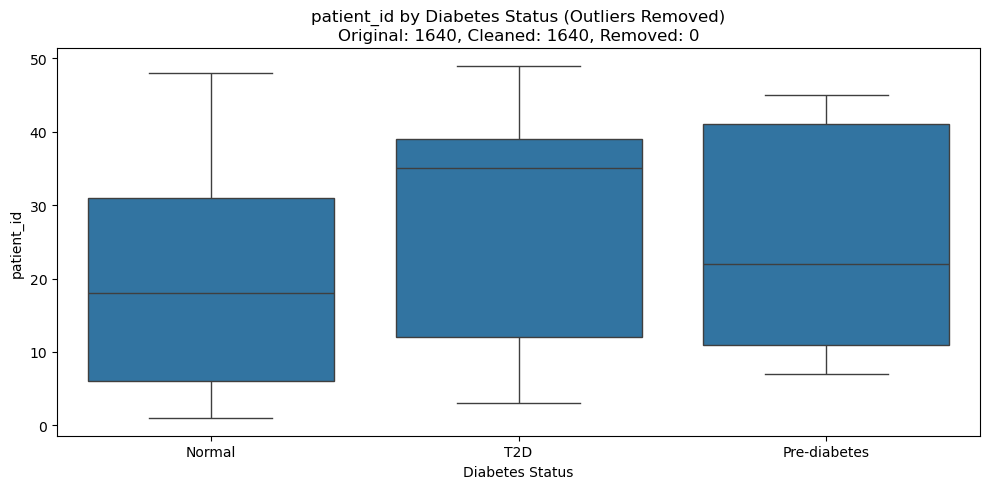

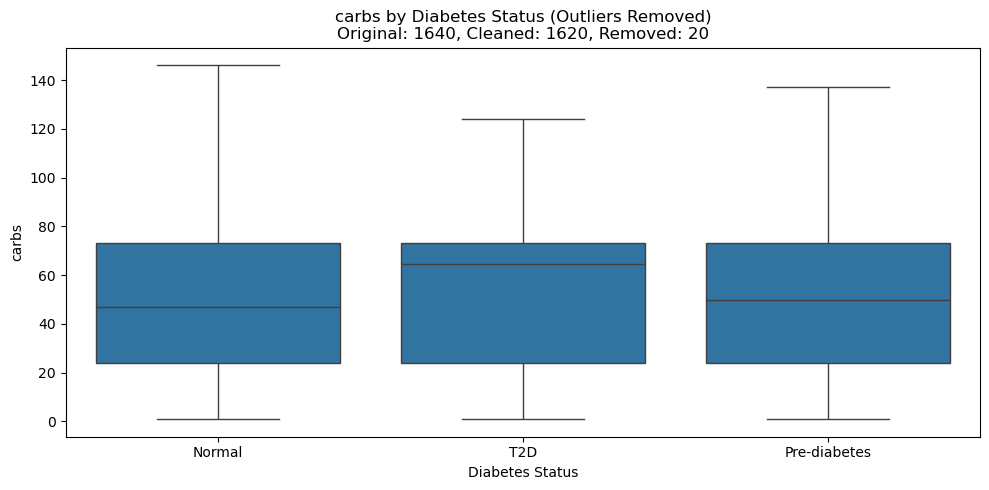

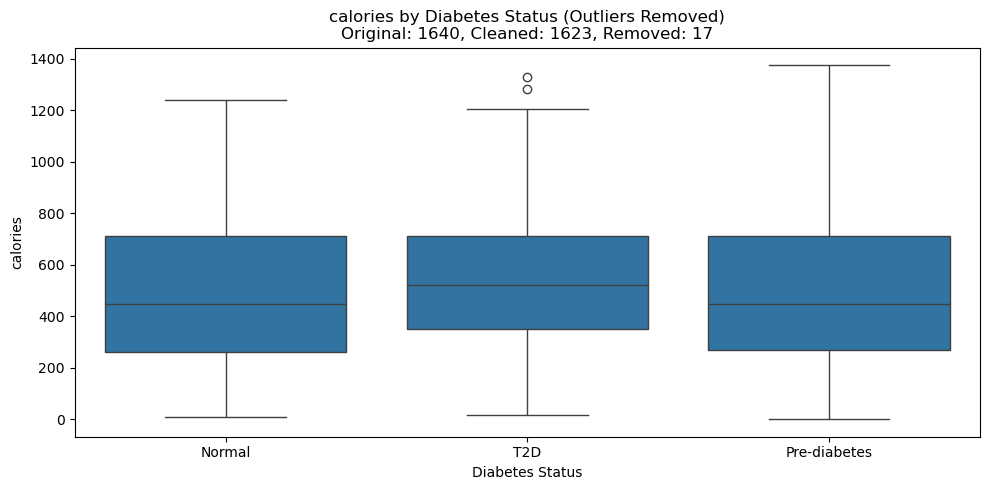

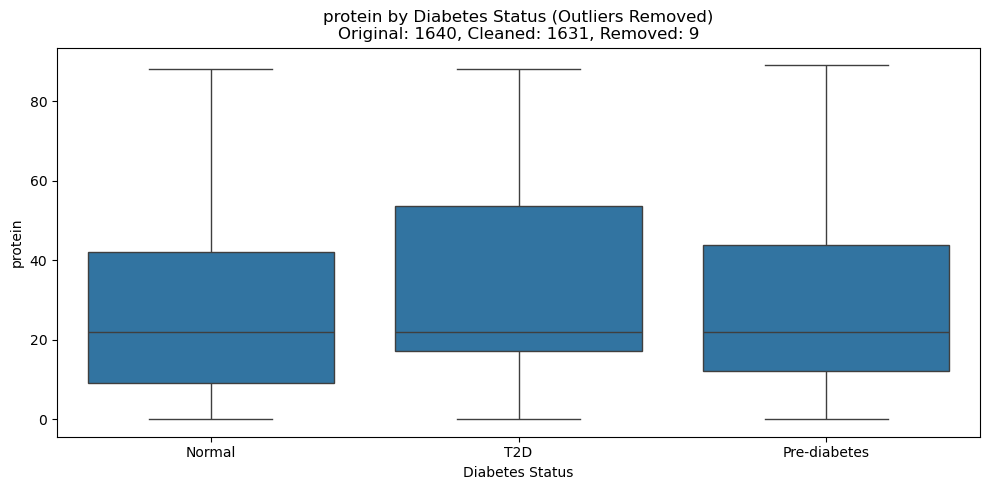

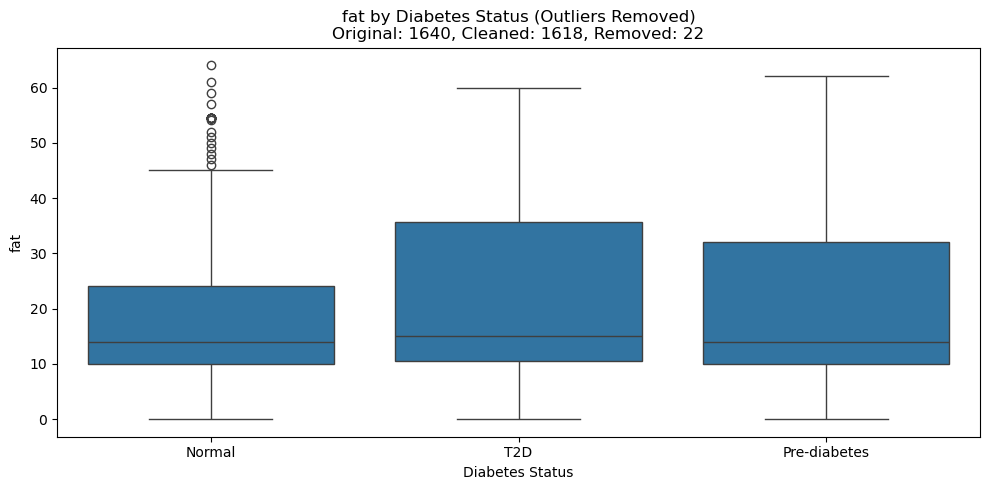

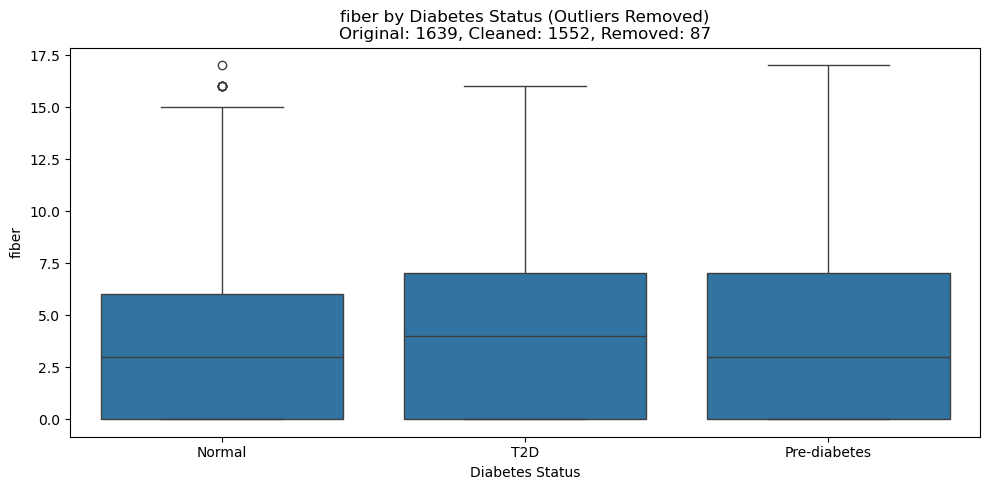

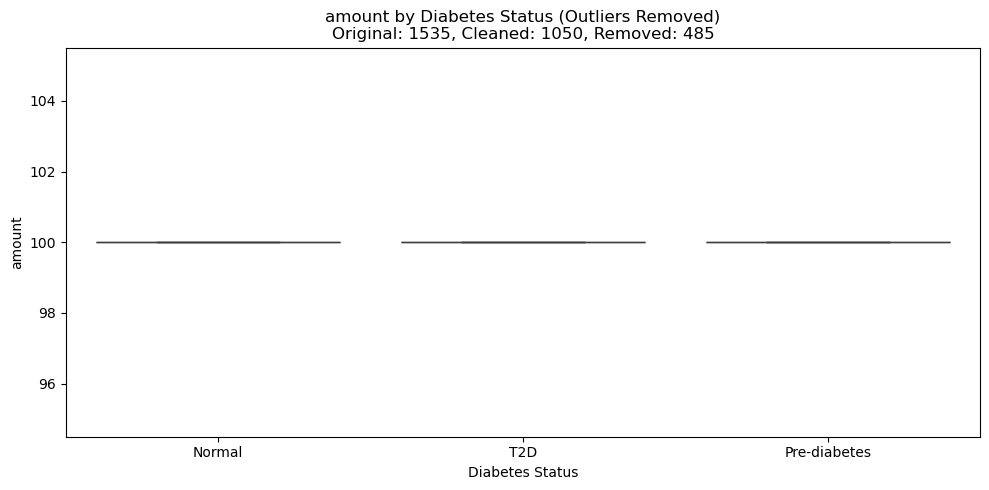

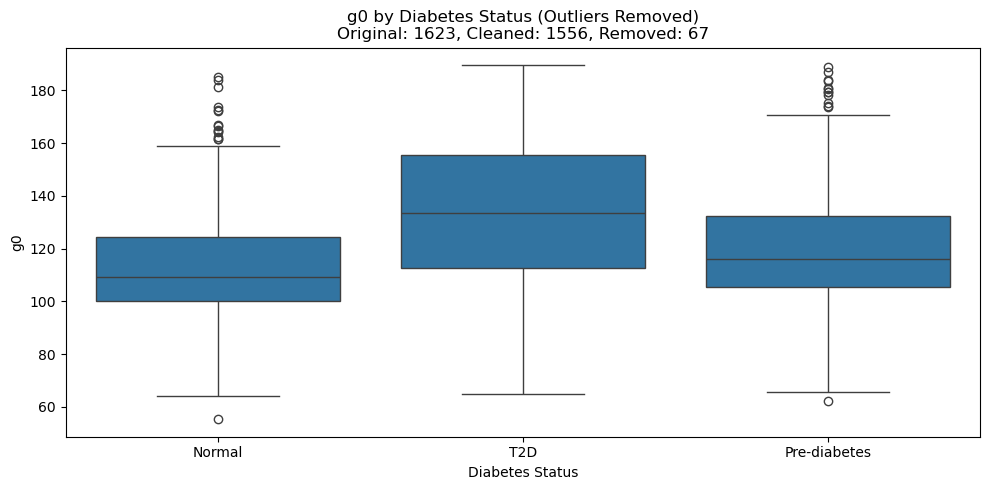

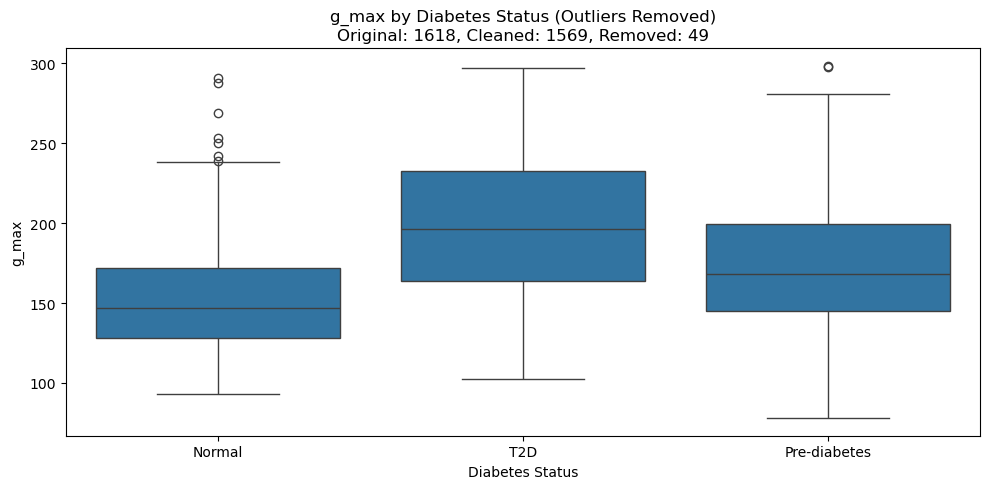

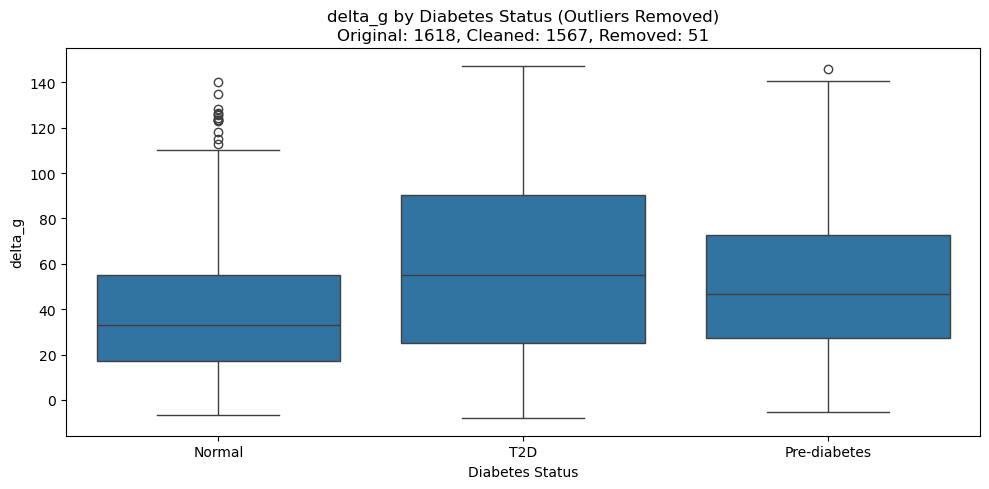

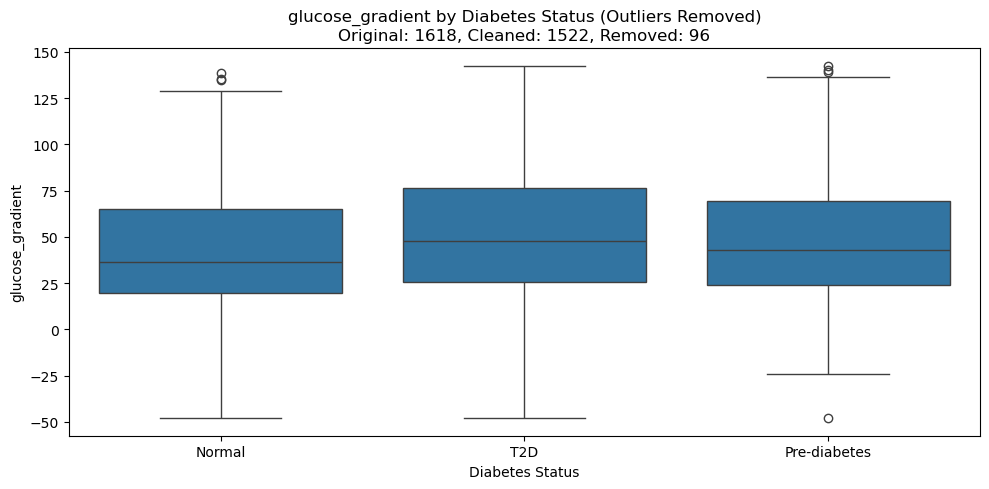

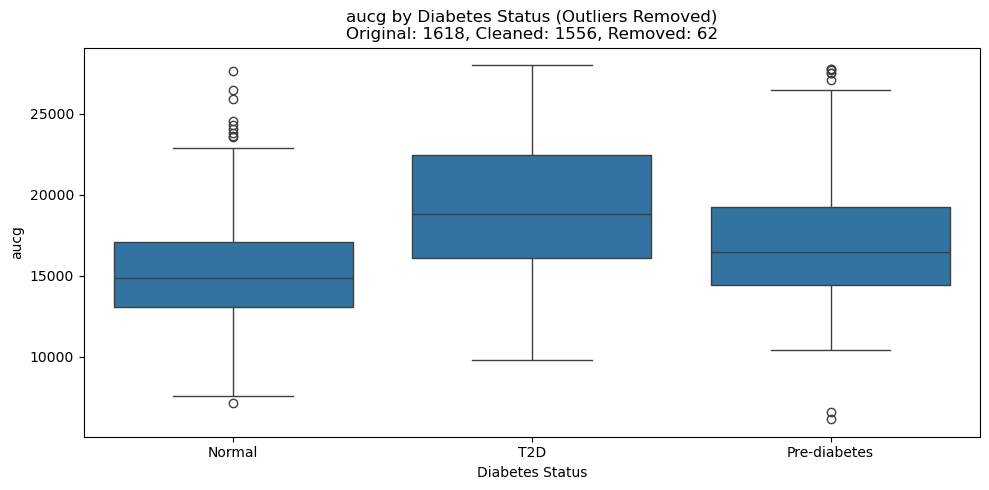

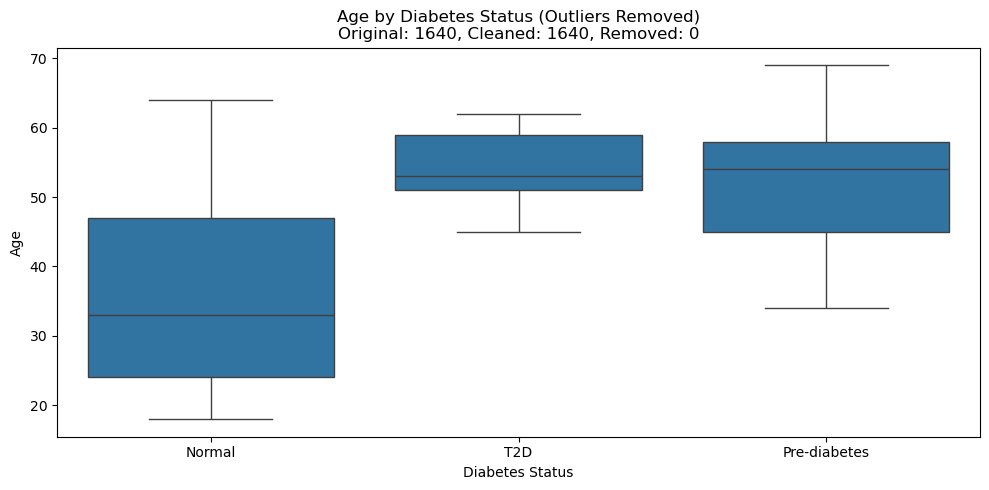

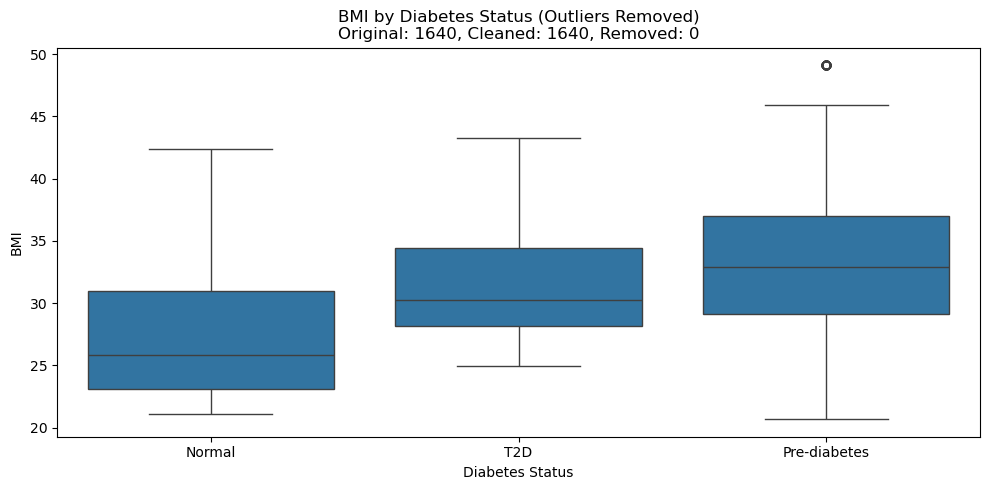

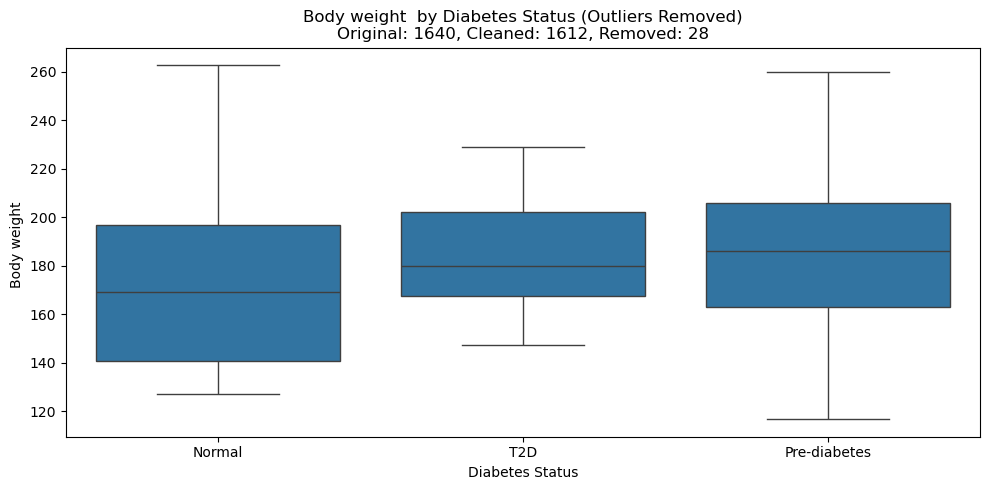

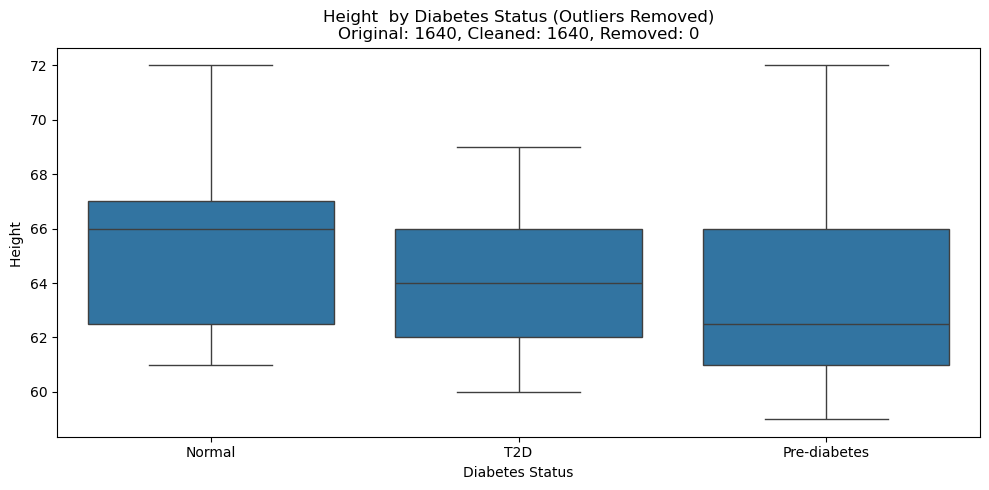

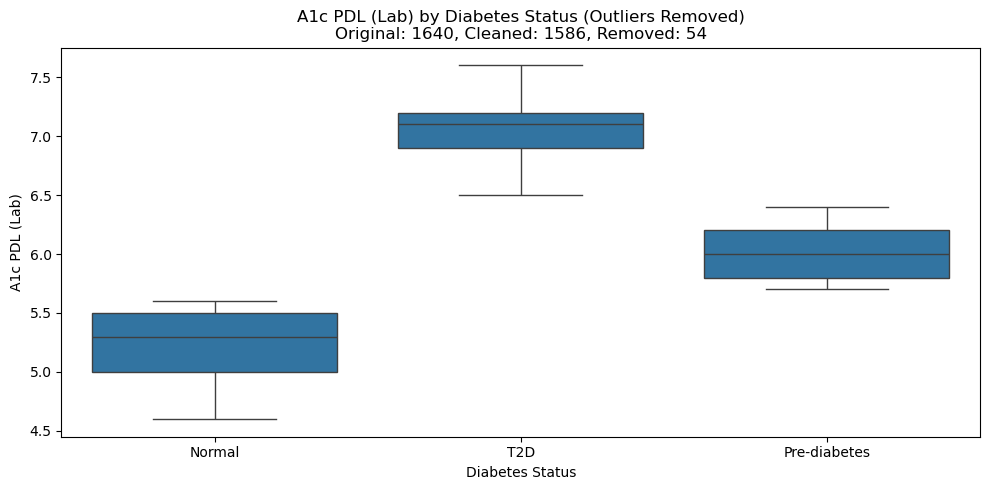

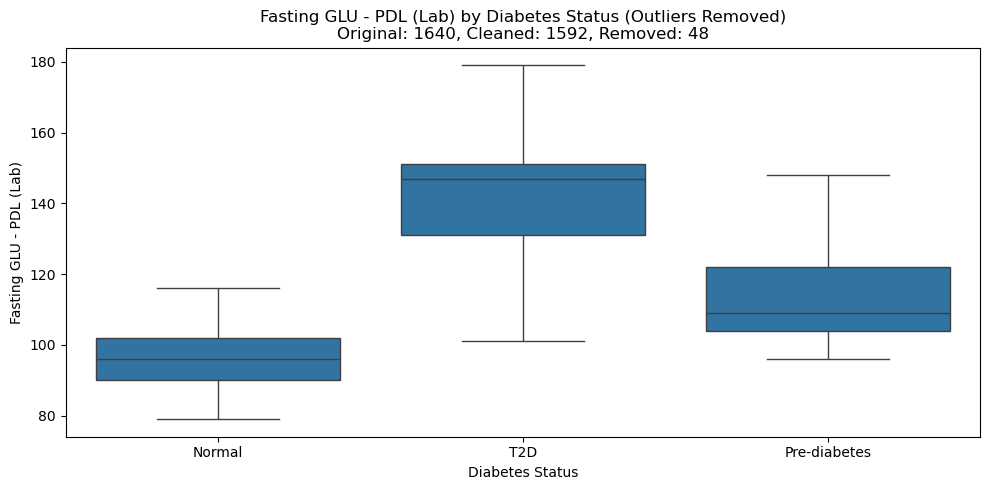

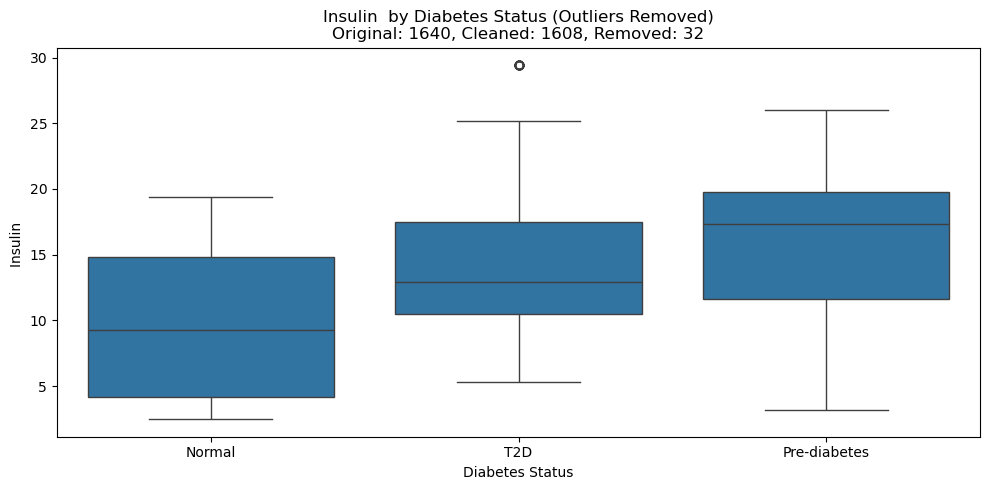

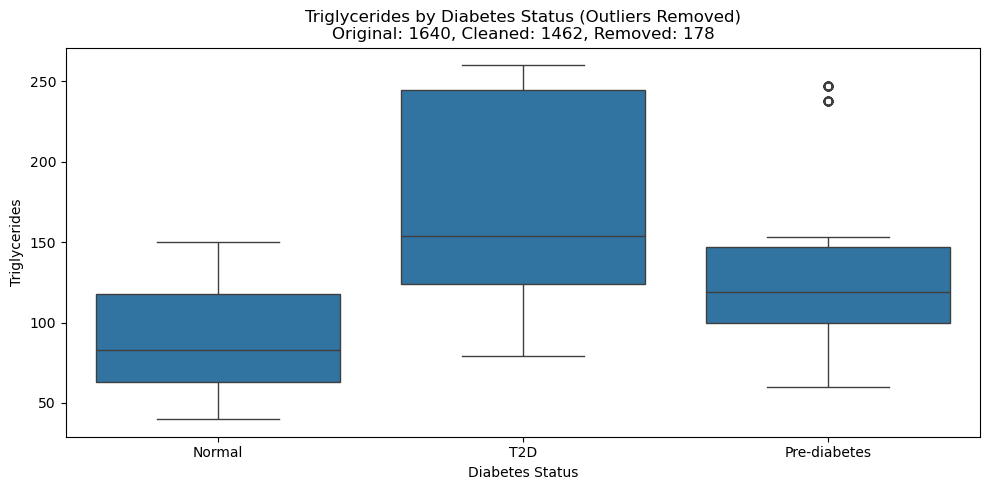

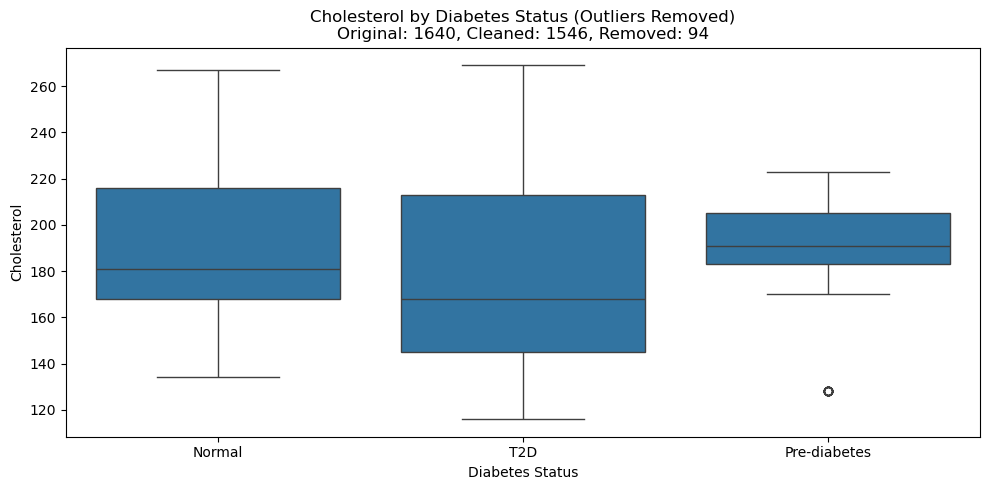

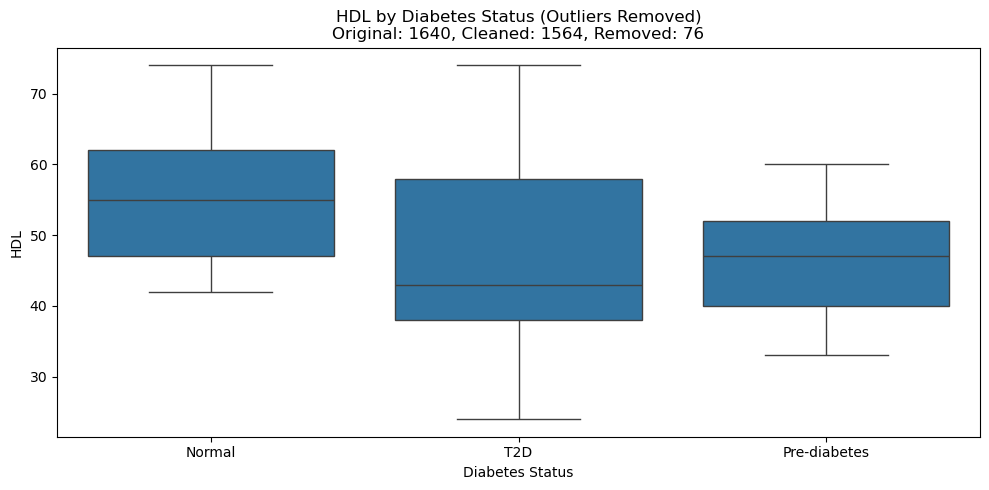

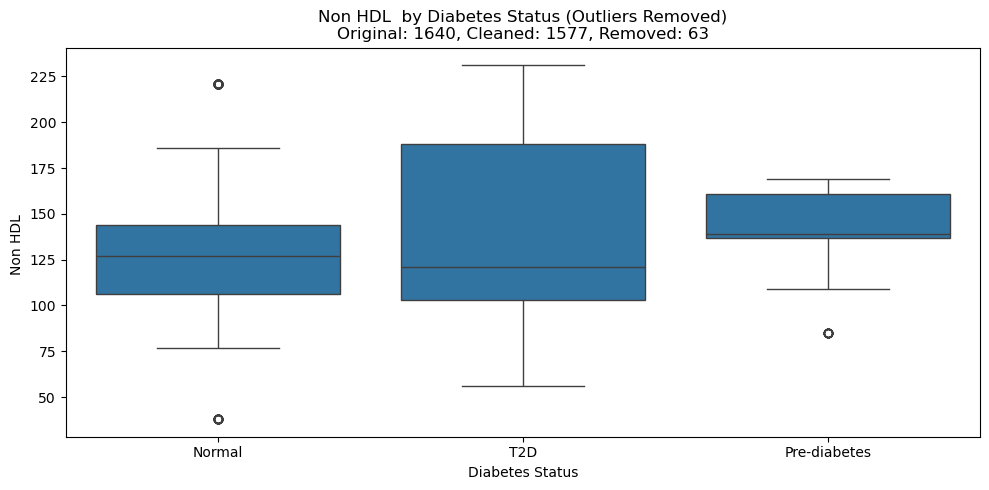

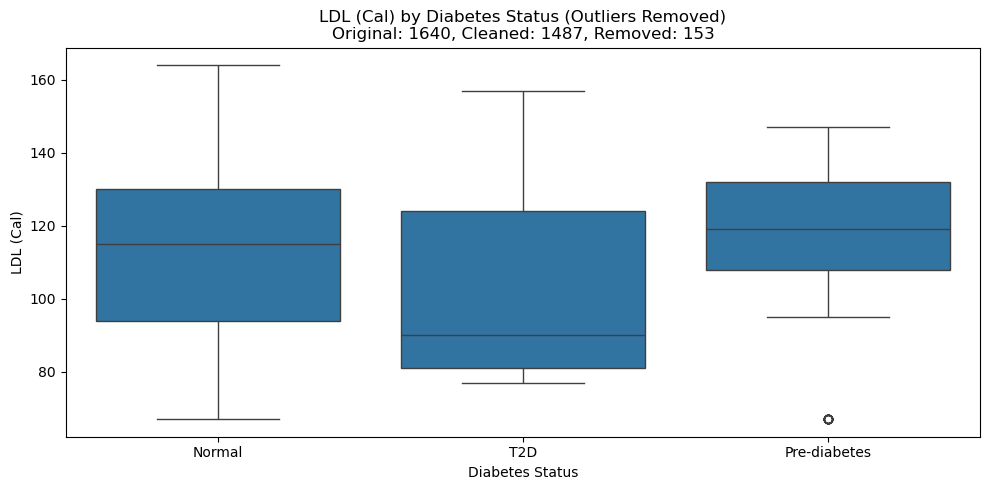

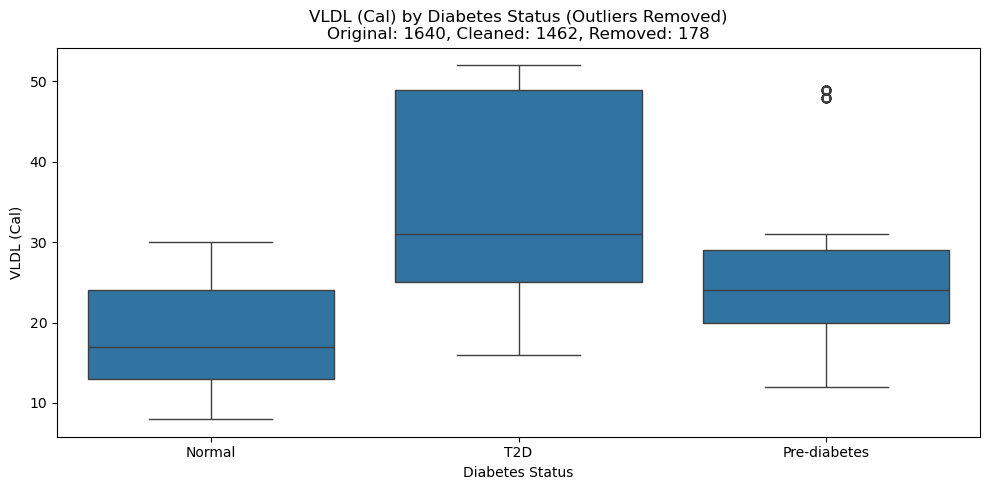

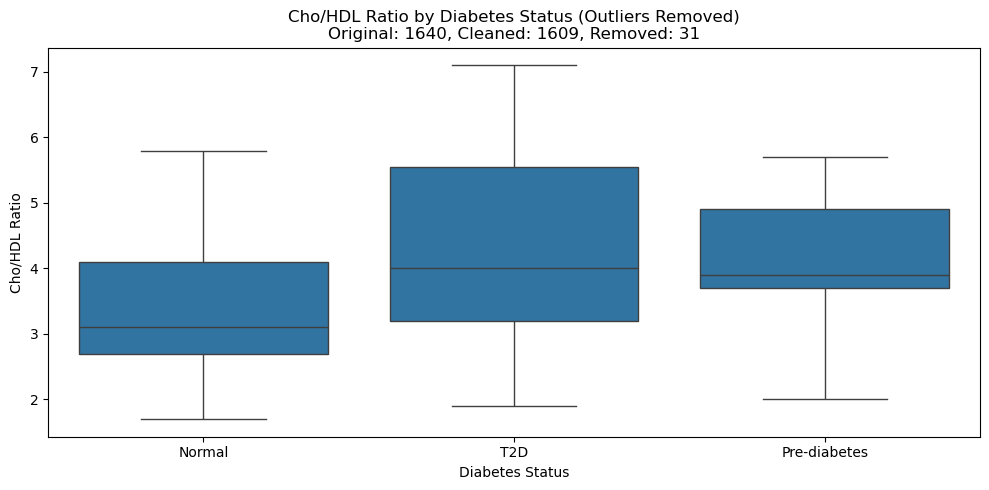

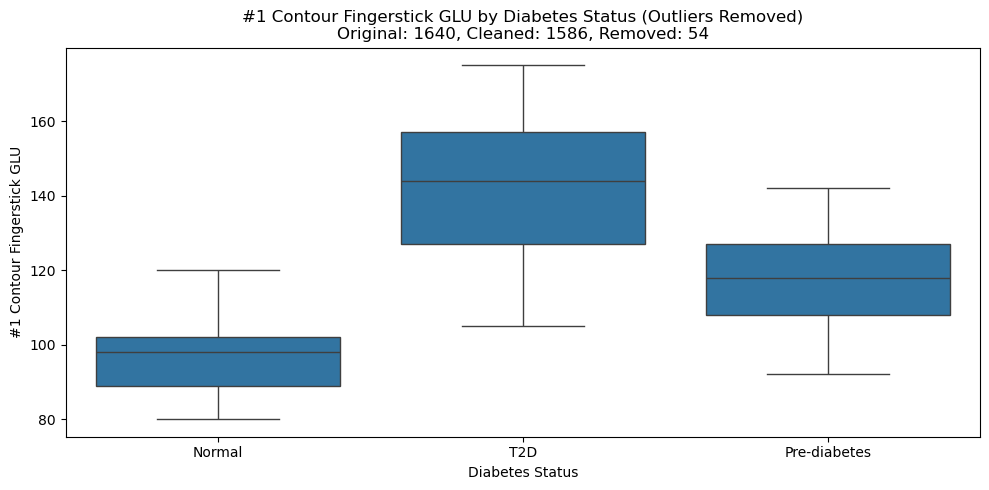

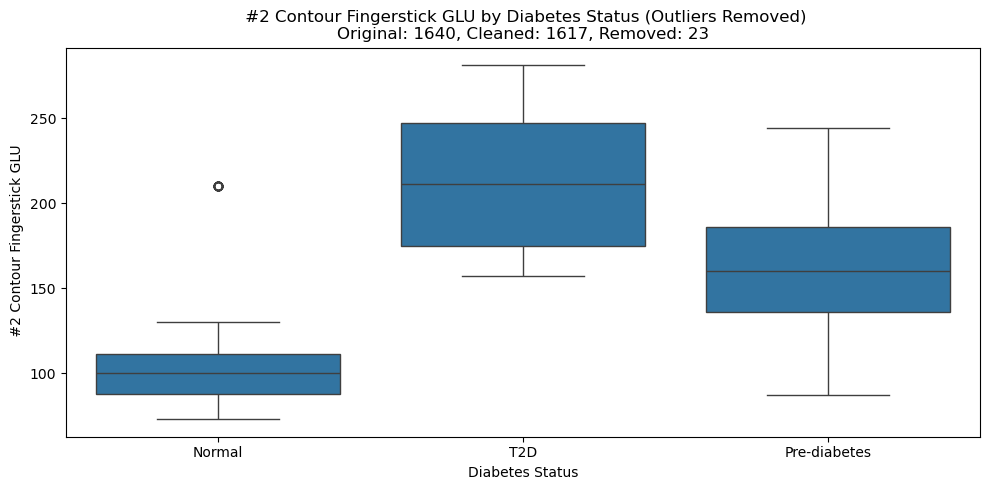

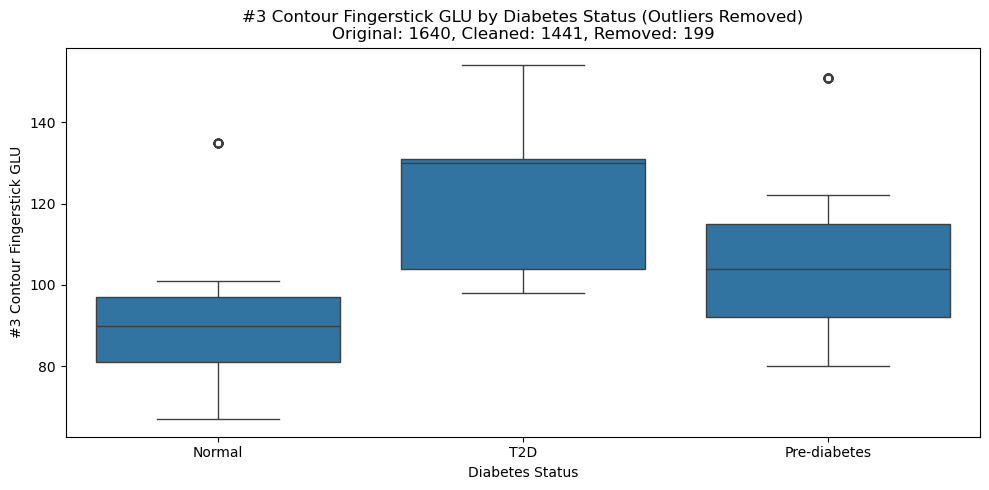

In [47]:
def remove_outliers_iqr(df, column):
    """IQR 방식으로 이상치를 제거한 DataFrame 반환"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# 피처별 시각화 및 정보 출력
for feat in features:
    original_count = merged_df[feat].notna().sum()
    cleaned_df = remove_outliers_iqr(merged_df, feat)
    cleaned_count = cleaned_df[feat].notna().sum()
    removed_count = original_count - cleaned_count

    # 박스플롯 시각화
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=cleaned_df, x="diabetes_status", y=feat)
    plt.title(f"{feat} by Diabetes Status (Outliers Removed)\n"
              f"Original: {original_count}, Cleaned: {cleaned_count}, Removed: {removed_count}")
    plt.xlabel("Diabetes Status")
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()
